# Kelompok 1 UNO Inc.

Nama Anggota beserta Role-nya :
- Devriansyah         : Data Science Leader
- Vira Diana          : Data Analyst
- Farih Afdhalul Ihsan     : Machine Learning Engineer
- Dignu Akbar         : Data Scientist
- Kun Anggiar         : Statistician
- Laurenzius Julio    : Machine Learning Engineer
- Adinda Dita         : Data Analyst 
- Rahmadani A         : Statistician

## Import, Install, and Upgrade Library 

In [1]:
#Upgrade matplotlib
!pip install matplotlib==3.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Install Sidetable

!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sidetable as stb
import warnings    
import statistics
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure
from statistics import mode
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Dataset yang Digunakan

In [31]:
url='https://drive.google.com/file/d/1lrT_Eeeu5T_eNCFHkIk-RX-627rRPOpc/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [6]:
# Melihat sample data 
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Merename unamed menjadi index
df = df.rename(columns = {'Unnamed: 0' : 'index'})
df.head()

,index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Deskripsi Variabel pada Dataset

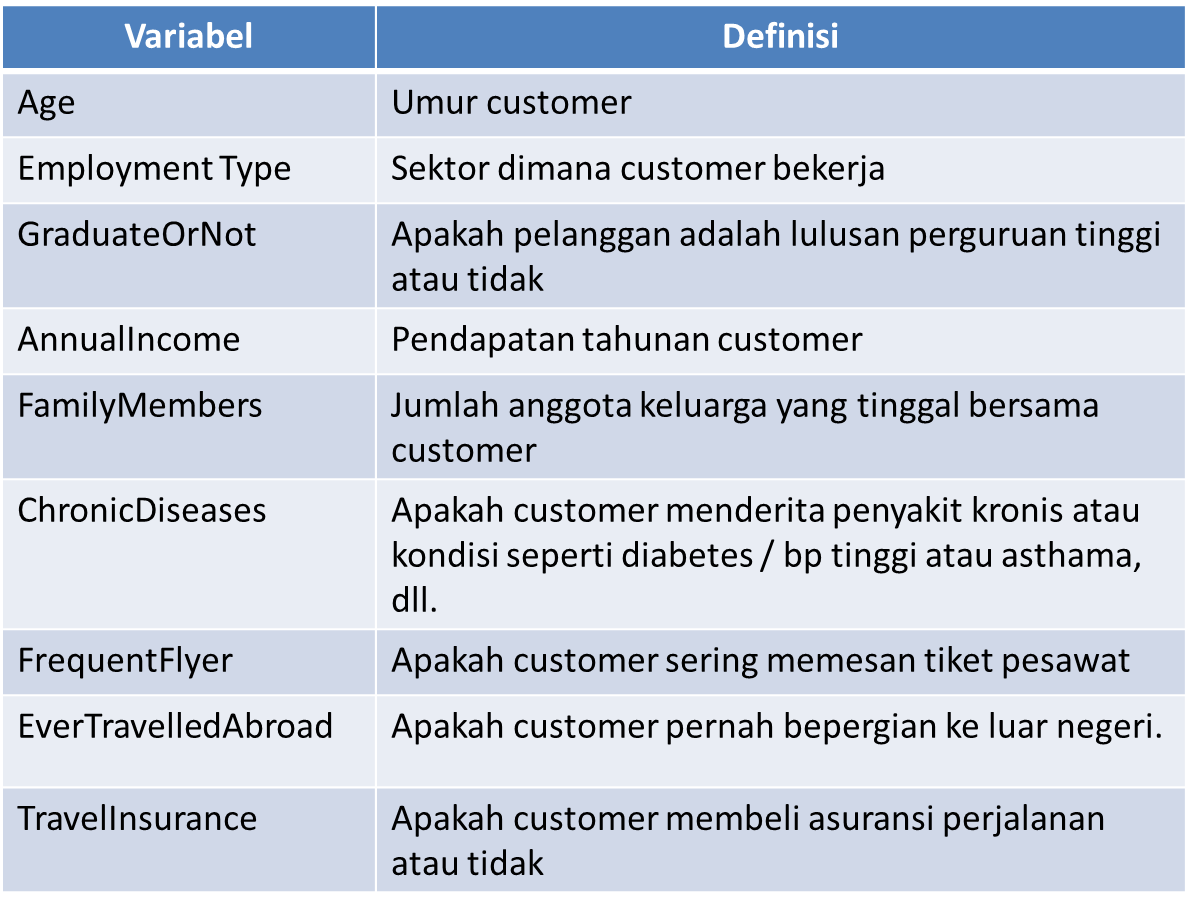

## EDA

In [ ]:
# Mengecek dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [ ]:
# Cek data kosong
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
# Cek jumlah baris dan kolom data
df.shape

(1987, 9)

**Intepretasi**
- Data terdiri dari 8 kolom fitur, 1 kolom target, dan 1987 baris data.
- Kolom age, annual income, family members, chronic diseases dan travel insurance bertipe integer.
- Kolom Employment type, graduate or not, frequent flyer, dan ever travelled abroad bertipe object. 
- Keempat kolom yang bertipe object pada point nomor 3 merupakan data Boolean yang bisa dilakukan feature encoding pada stage selanjutnya.
- Pada dataset ini, tidak ditemukan data null maupun NaN.


In [ ]:
# Cek data duplikat
df.duplicated(subset = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad',"TravelInsurance"]).sum()

738

**Intepretasi**

Pada dataset ini kita tidak menginclude pengecekan data duplikat pada data index dan tidak ditemukan sebanyak 738 baris data duplikat.
Data duplikat tersebut tidak di drop terlebih dahulu pada step ini, dan akan dilakukan pada stage 2 pada saat tahap data cleansing.


In [ ]:
# Melihat isi Unique pada Coloumn
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("") 

Age :
[31 34 28 25 33 26 32 29 35 30 27]

Employment Type :
['Government Sector' 'Private Sector/Self Employed']

GraduateOrNot :
['Yes' 'No']

AnnualIncome :
[ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]

FamilyMembers :
[6 7 4 3 8 9 5 2]

ChronicDiseases :
[1 0]

FrequentFlyer :
['No' 'Yes']

EverTravelledAbroad :
['No' 'Yes']

TravelInsurance :
[0 1]



In [ ]:
# Melihat Statistik Deskriptif 
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
# Cek Modus
modus_age = statistics.mode(df['Age'])
modus_annualincome  = statistics.mode(df['AnnualIncome'])
modus_familymembers = statistics.mode(df['FamilyMembers'])

print(f'Modus Age adalah {modus_age}')
print(f'Modus Annual Income adalah {modus_annualincome}')
print(f'Modus Family Members adalah {modus_familymembers}')

Modus Age adalah 28
Modus Annual Income adalah 800000
Modus Family Members adalah 4


**Intepretasi**

Melihat gambaran umum statistika deskriptif pada dataset. Statistika deskriptif akan difokuskan pada variabel yang berjenis data numerik dan kategorikal setelah pengelompokkan tipe datanya. 

In [32]:
#Memisahkan data numerik dan data kategorik
num = [ 'Age','AnnualIncome','FamilyMembers']
cat = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']

In [ ]:
# Melihat Statistika Deskriptif Data Numerik
df[num].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


**Intepretasi**
- Range data min dan max masih bisa dikatakan wajar atau belum terlihat adanya data yang berbeda signifikan di setiap kolom
- Nilai mean dan median tidak terlampau jauh untuk setiap kolomnya
- Pada kolom age dan annual income nilai mean > median, sehingga datanya positively skewed.
- Sedangkan data family member negatively skewed karena nilai mean < median. 


In [ ]:
df[cat].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [ ]:
df=df.drop_duplicates()

**Intepretasi**

Mayoritas customer pada dataset ini berasal dari private sector / self employed dan graduate. Namun, kebanyakan customer bukan frequent flyer dan never travelled abroad. (lebih dari 70%). 

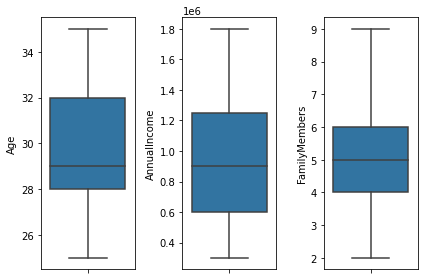

In [33]:
for i in range(0,len(num)) :
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]],  orient = 'v')
    plt.tight_layout()

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
df['AnnualIncome'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))

Berdasarkan grafik boxplot diatas dapat diketahui bahwa data dari variabel yang berjenis numerikal **'Age', 'AnnualIncome', dan 'FamilyMember'** tidak memiliki outliers.

**Single Distribution**

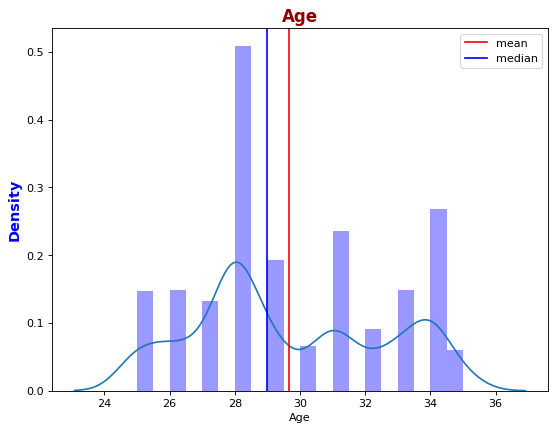

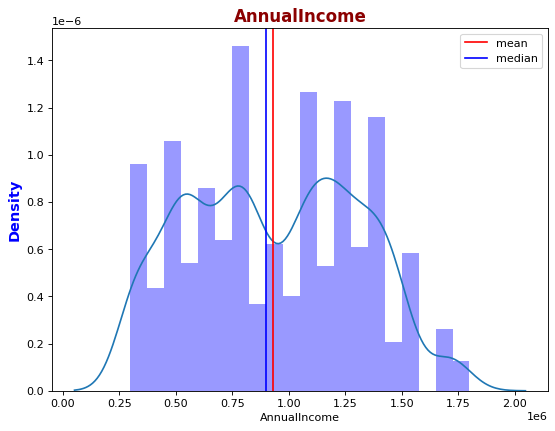

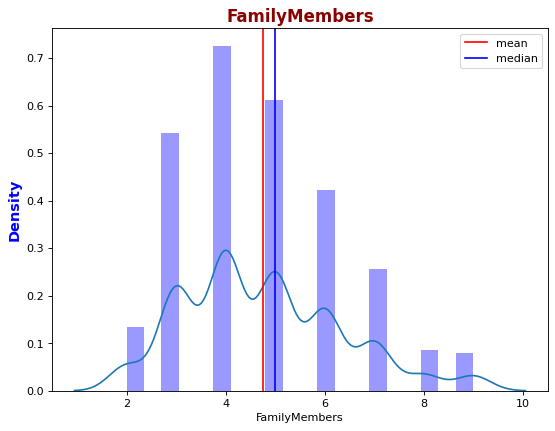

In [34]:
title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "blue", "weight" : "bold", "size" : 13}

for i in list(num):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, color = "blue"), bins = 20)
    
    plt.axvline(df[i].describe()['mean'], color = 'red', label = 'mean')
    plt.axvline(df[i].describe()['50%'], color = 'blue', label = 'median')
    
    
    plt.title(i, fontdict = title_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.legend()
    plt.show()

In [ ]:
#skewness value
for i in range(0, len(num)):
    print(f"Skewness {df[num].columns[i]} : {df[num[i]].skew()}")

Skewness Age : 0.1766593709859495
Skewness AnnualIncome : 0.1455499784860766
Skewness FamilyMembers : 0.44079226295946317


**Intepretasi**
- Variabel Age dan AnnualIncome bersifat positevely skew karena mean > median dan plot menjorok kekanan sedangkan FamilyMember bersifat negatively skew karena median > mean dan plot menjorok ke kekiri.

- Variabel Age dan AnnualIncome persebaran datanya simetris karena skewness value berada diantara -0,5 dan 0,5 sedangkan variabel FamilyMembers persebaran datanya moderately skewkarena skewness value berada diantara 0.5 dan 1.


**Numerical Values**

**Age**

In [ ]:
fig=px.histogram(df[num],'Age')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
df[num].stb.freq(['Age'], cum_cols = False)

,Age,count,percent
0,28,283,22.658127
1,34,158,12.650120
2,31,148,11.849480
3,29,125,10.008006
4,33,108,8.646918
5,27,91,7.285829
6,26,91,7.285829
7,25,87,6.965572
8,32,67,5.364291
9,30,47,3.763010


**Intepretasi**

- Tiga usia customer terbanyak pada dataset ini adalah usia 28, 34, dan 31 
- Pada histogram tersebut mayoritas customer berusia 28 tahun dengan presentasi 25,4% dari keseluruhan data


**Annual Income**

In [ ]:
fig=px.histogram(df[num], 'AnnualIncome')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
df[num].stb.freq(['AnnualIncome'], cum_cols=False)

,AnnualIncome,count,percent
0,0.133333,90,7.205765
1,0.333333,86,6.885508
2,0.533333,74,5.924740
3,0.733333,73,5.844676
4,0.200000,70,5.604484
5,0.666667,68,5.444355
6,0.600000,67,5.364291
7,0.166667,58,4.643715
8,0.400000,57,4.563651
9,0.266667,56,4.483587


**Intepretasi**

- Tiga annual income tertinggi customer pada dataset ini adalah 0.5, 0.8, dan 1.4 INR
- Pada histogram tersebut mayoritas customer memiliki annual income 800.000 dengan presentasi 7,7% dari keseluruhan data


**Family Member**

In [ ]:
fig=px.histogram(df[num], 'FamilyMembers')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
df[num].stb.freq(['FamilyMembers'], cum_cols=False)

,FamilyMembers,count,percent
0,4,275,22.017614
1,5,243,19.455564
2,3,225,18.014412
3,6,186,14.891914
4,7,140,11.208967
5,2,78,6.244996
6,8,52,4.163331
7,9,50,4.003203


**Intepretasi**

- Tiga customer teratas memiliki family members 3 sampai 5 orang
- Pada histogram tersebut mayoritas customer memiliki 4 family members dengan presentase 25,41% dari keseluruhan data


**Categorical Data**

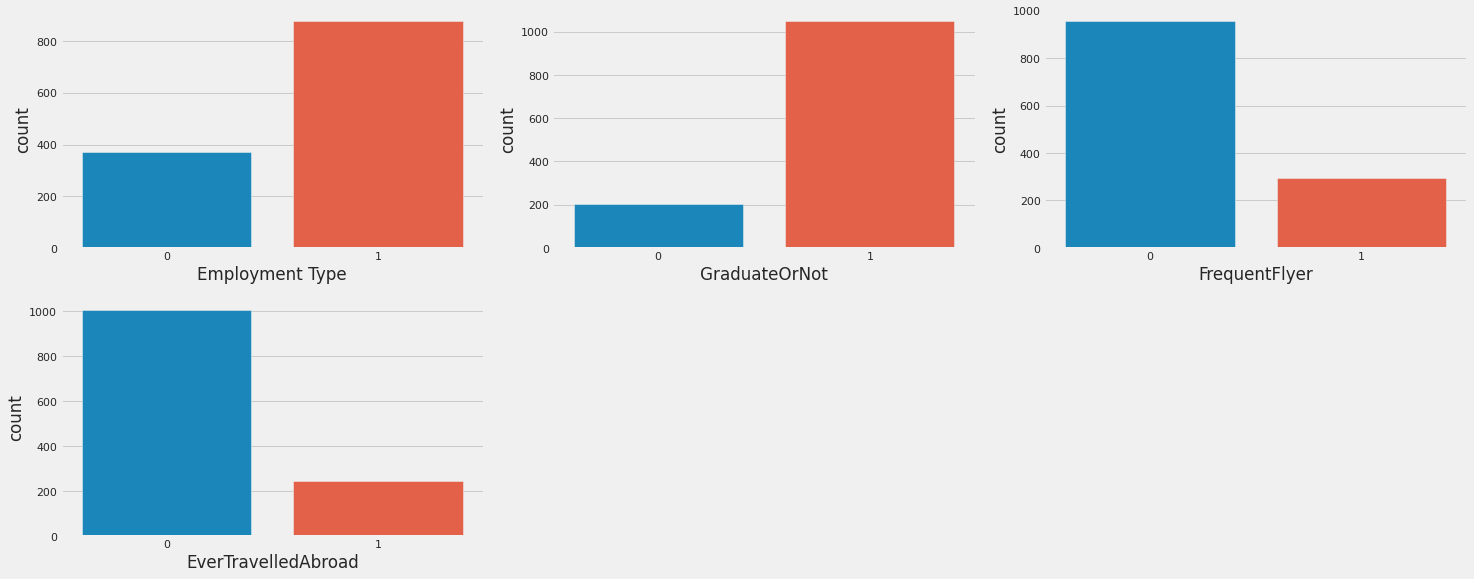

In [ ]:
features = cat
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[cat[i]])
  plt.tight_layout()

In [ ]:
# Employment Type
df[cat].stb.freq(['Employment Type'], cum_cols=False)

,Employment Type,count,percent
0,Private Sector/Self Employed,876,70.136109
1,Government Sector,373,29.863891


In [ ]:
# Graduatee Or Not
df[cat].stb.freq(['GraduateOrNot'], cum_cols=False)

,GraduateOrNot,count,percent
0,Yes,1047,83.827062
1,No,202,16.172938


In [ ]:
# Frequent Flyer
df[cat].stb.freq(['FrequentFlyer'], cum_cols=False)

,FrequentFlyer,count,percent
0,No,954,76.381105
1,Yes,295,23.618895


In [ ]:
# Chronic Diseases
df.stb.freq(['ChronicDiseases'], cum_cols=False)

,ChronicDiseases,count,percent
0,0,1435,72.219426
1,1,552,27.780574


In [ ]:
# Ever Traveled Abroad
df[cat].stb.freq(['EverTravelledAbroad'], cum_cols=False)

,EverTravelledAbroad,count,percent
0,No,1005,80.464371
1,Yes,244,19.535629


In [ ]:
# Travel Insurance
df.stb.freq(['TravelInsurance'], cum_cols=False)

,TravelInsurance,count,percent
0,0,1277,64.26774
1,1,710,35.73226


**Intepretasi**

- Mayoritas Individu dengan 71.31% dari keseluruhan populasi bekerja di private sector (perusahaan swasta) dan self employment atau bekerja mandiri.
- Mayoritas Individu yang terdaftar dengan 85,15% dari keseluruhan populasi merupakan lulusan kuliah.
- Mayoritas individu yang terdaftar dengan 79.01% dari populasi jarang berpergian menggunakan layanan penerbangan.
- Mayoritas individu yang terdaftar dengan 72,21% dari populasi tidak mengidap penyakit kronis.
- Mayoritas individu dengan 80,87% dari keseluruhan populasi tidak pernah bepergian keluar negeri
- Mayoritas individu dengan 64,26% dari keseluruhan populasi belum membeli travelinsurance

**Follow Up yang perlu dilakukan di Data Processing berdasarkan hasil analisis** 


**Data Cleansing**

- Tidak perlu dilakukan handling missing value karena tidak adanya data yang null
- Terdapat 738 duplicate data yang perlu diremove.
- Terdapat beberapa features yang bertipe jenis kategorikal yang perlu dilakukan feature encoding dan transformation (FamilyMembers, FrequentFlyer, EverTravelledAbroad, ChronicDisseases, GraduateOrNot, dan Employment Type). 
- Terpantau datasetnya masih cukup balance dilihat dari persebaran kolom target travel insurance. Pada data processing perlu dilakukan Smote / Weight Class Sampling / Oversampling / Undersampling.
- Tidak terdapat adanya outliers sehingga tidak perlu dilakukannya handling outliers.


**Feature Engineering**

- Melakukan feature selection dengan menggunakan Chi Square (Feature Kategorik -> Target Kategorik) dan Anova (Feature Numerik -> Target Kategorik).
- Mungkin bisa melakukan feature extraction dengan membuat feature baru yakni income per capita yang didapat dari kolom (Annual Income / Family Member) dan lain sebagainya.


### Multivariate Analysis

**Correlation by Heatmap**

In [ ]:
# Melakukan Categorial Encoding agar data kategorik bisa ditampilkan di heatmap
df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})

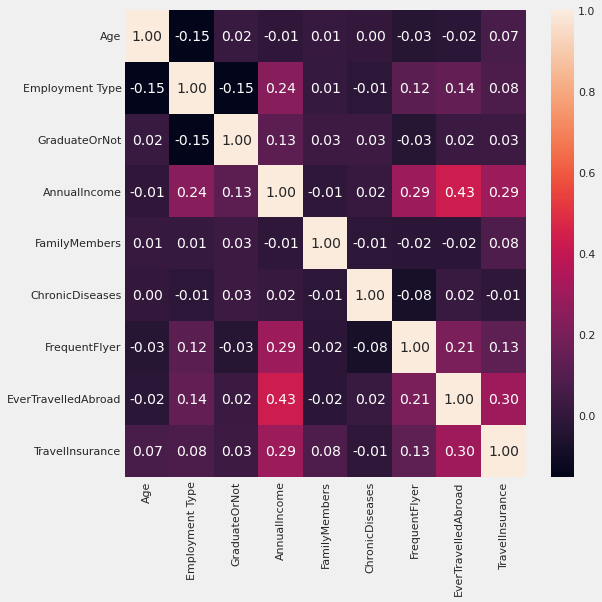

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Intepretasi hasil korelasi heatmap**

- Variabel AnnualIncome dan EverTravelledAbroad  memiliki korelasi positif yang cukup kuat terhadap Travel Insurance karena rentang nilainya diatas atau sama dengan 0.4. Artinya semakin besar variabel AnnualIncome dan EverTravelledabroad maka semakin besar pula nilai travel insurance-nya.

- Variabel FrequentFlyer memiliki korelasi positif moderat terhadap Travel Insurance karena nilai korelasinya berada pada rentang 0.2 hingga 0.4.

- Variabel Age, EmploymentType, GraduateOrNot, FamilyMembers, Chronic Diseasses memiliki korelasi positif rendah terhadap TravelInsurance karena nilai korelasinya berada pada 0.0 hingga 0.2. Hal ini berarti 5 variabel diatas memiliki kemungkinan kecil dalam mempengaruhi pembelian Travel Insurance.

- EmploymentType dan FrequentFlyers memiliki korelasi positif moderat terhadap AnnualIncome karena nilai korelasinya berada pada nilai 0.2 hingga 0.4. Hal ini berarti EmploymentType dan FrequentFlyers  memiliki kemungkinan mempengaruhi pembelian travel insurance secara tidak langsung lewat variabel AnnualIncome.

- Variabel EmployementType, EverTravelledAbroad, AnnualIncome,dan FrequentFlyers perlu dianalisis lebih dalam karena dapat memberikan business insight berharga bagi peningkatan Travel Insurance.

- Variabel Travel Insurance terdeteksi memiliki class imbalance  ringan maka nantinya perlu dilakukan smote / weight class sampling / oversampling / undersampling di data processing.


Sumber : https://www.simplypsychology.org/correlation.html

**Correlation and Distribution by Pairplot**

<Figure size 288x288 with 0 Axes>

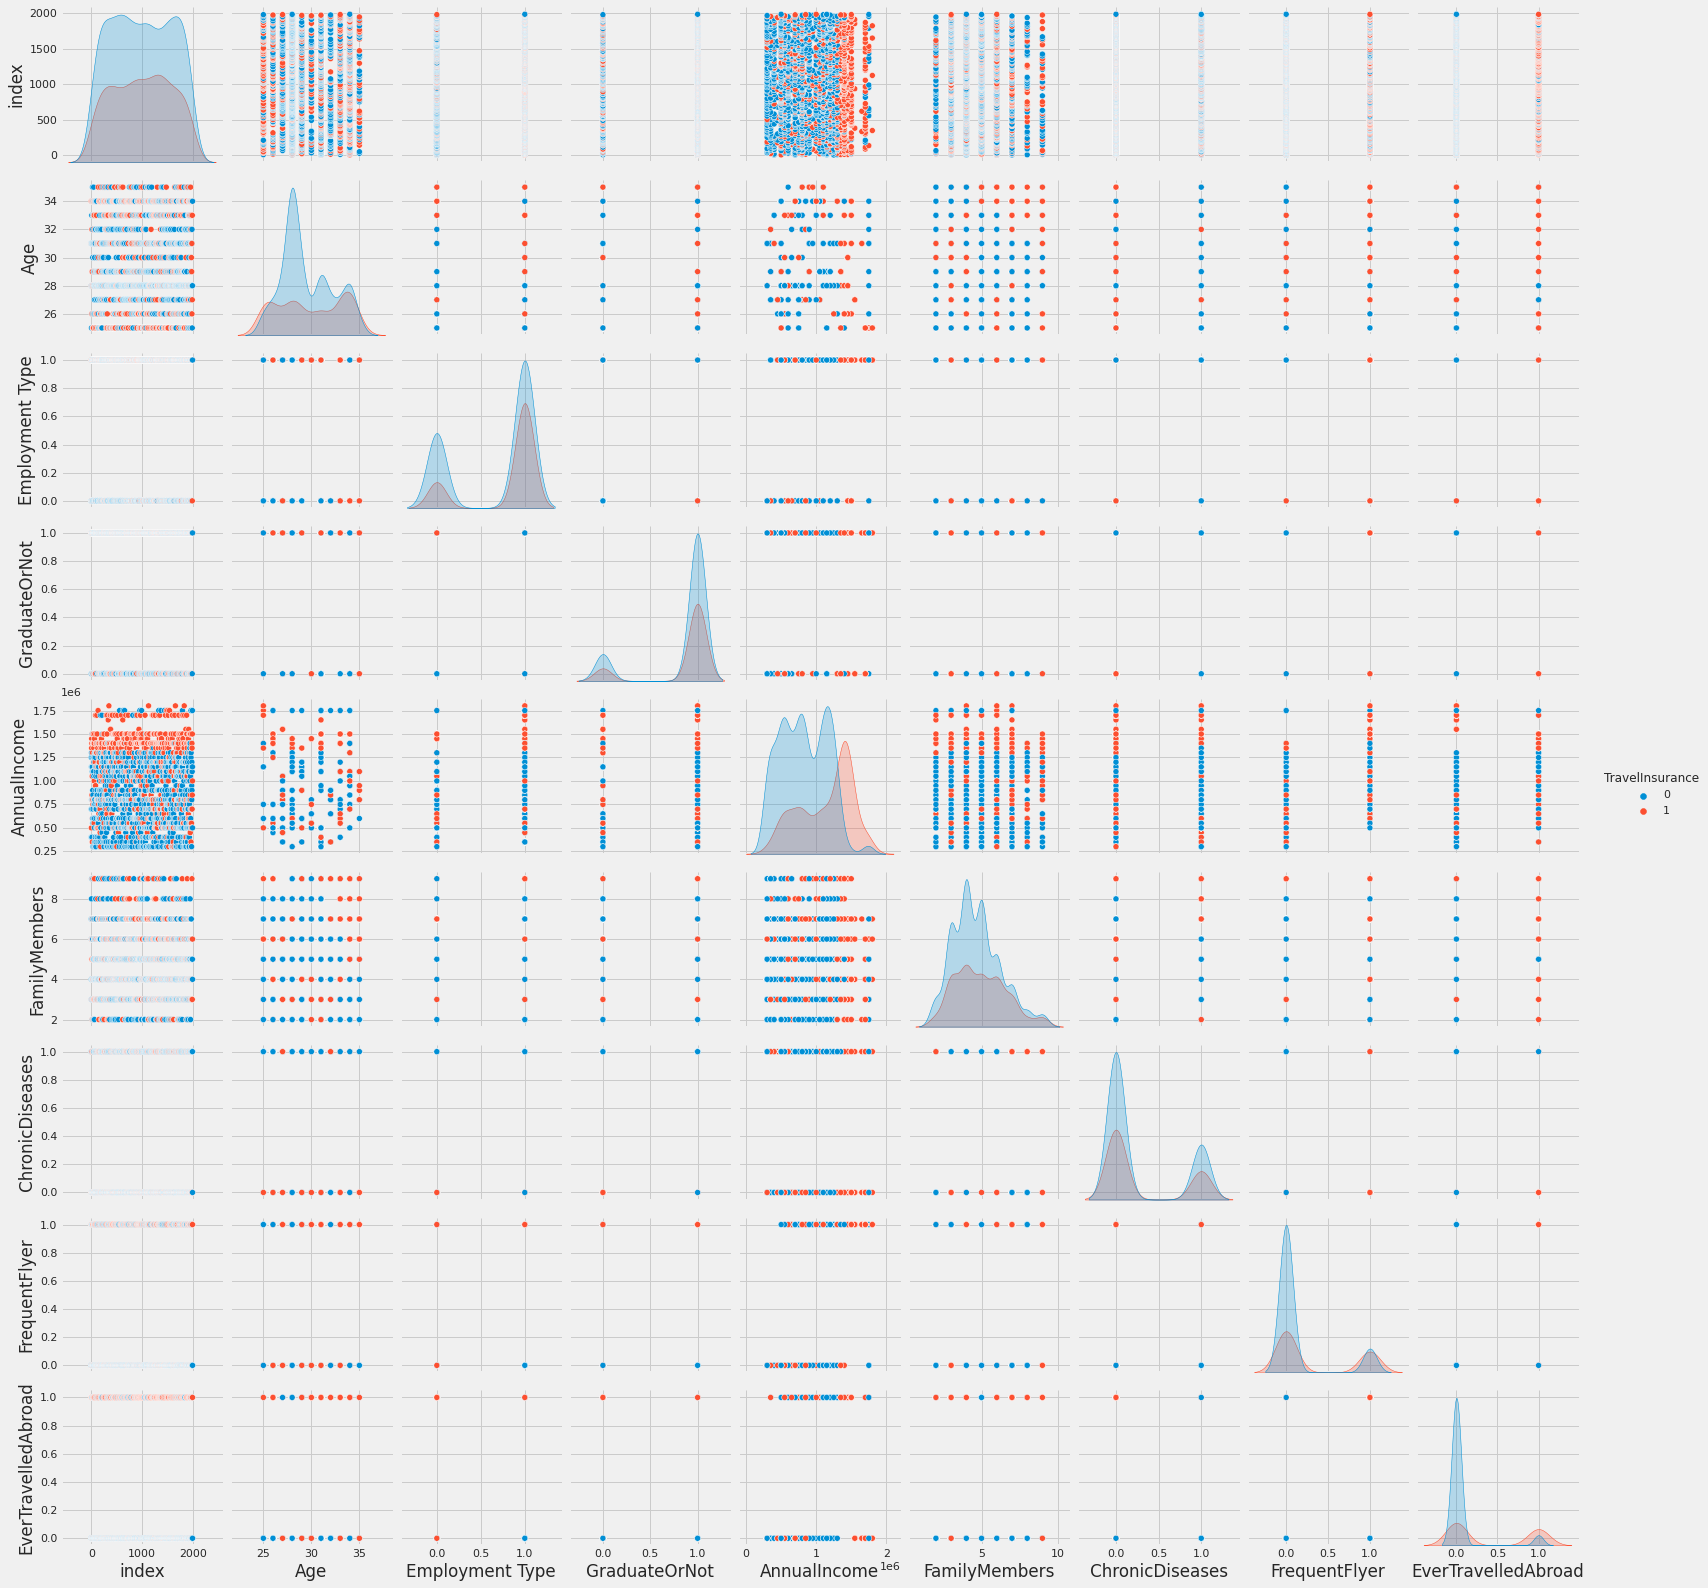

In [ ]:
#pallet size
plt.figure(figsize=(4,4))

#pairplot
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance')

plt.show()

**Intepretasi Korelasi dan Distribusi menggunakan Pairplot**

- Berdasarkan grafik pairplot diatas, kita dapat melihat bahwa jumlah data yang ada belum mampu menunjukan korelasi dan distribusi dari keseluruhan data terhadap variabel lainnya.

- Perlu dilakukan pengecekan lebih lanjut dengan menggunakan multibarplot pada variabel terhadap feature vs Target sehingga dapat diperoleh gambaran besar untuk business insightnya.

**A.Feature VS Target**

**1.Age VS TravelInsurance**

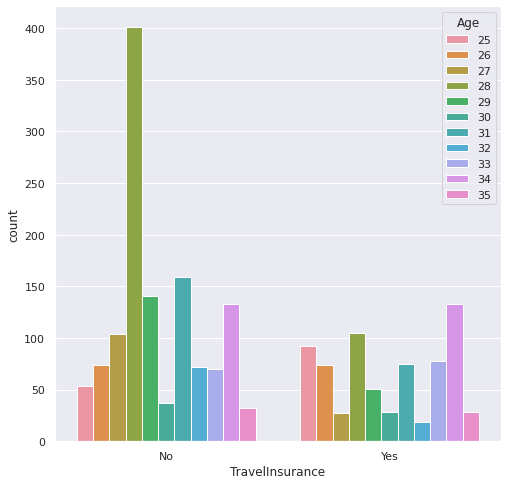

In [ ]:
df_travel_age = df.copy()
df_travel_age['TravelInsurance'] = df_travel_age['TravelInsurance'].astype(str)
df_travel_age['TravelInsurance'] = df_travel_age['TravelInsurance'].replace(['0','1'], ['No','Yes'])


fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Age',x='TravelInsurance',data=df_travel_age)
plt.show()

In [ ]:
df_age_travel = df.copy()
df_age_travel = pd.pivot_table(df_age_travel,
                              index=['Age'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_age_travel.columns =[0,1]
df_age_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_age_travel.drop([0],axis=1,inplace=True)
df_age_travel.reset_index(inplace=True)
df_age_travel['Total_Buy_Travel_Insurance'] = df_age_travel['Buy_Travel_Insurance'].sum()
df_age_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_age_travel['Buy_Travel_Insurance']/(df_age_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_age_travel

,Age,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,25,92,710,12.96
1,26,74,710,10.42
2,27,27,710,3.80
3,28,105,710,14.79
4,29,51,710,7.18
5,30,28,710,3.94
6,31,75,710,10.56
7,32,19,710,2.68
8,33,78,710,10.99
9,34,133,710,18.73


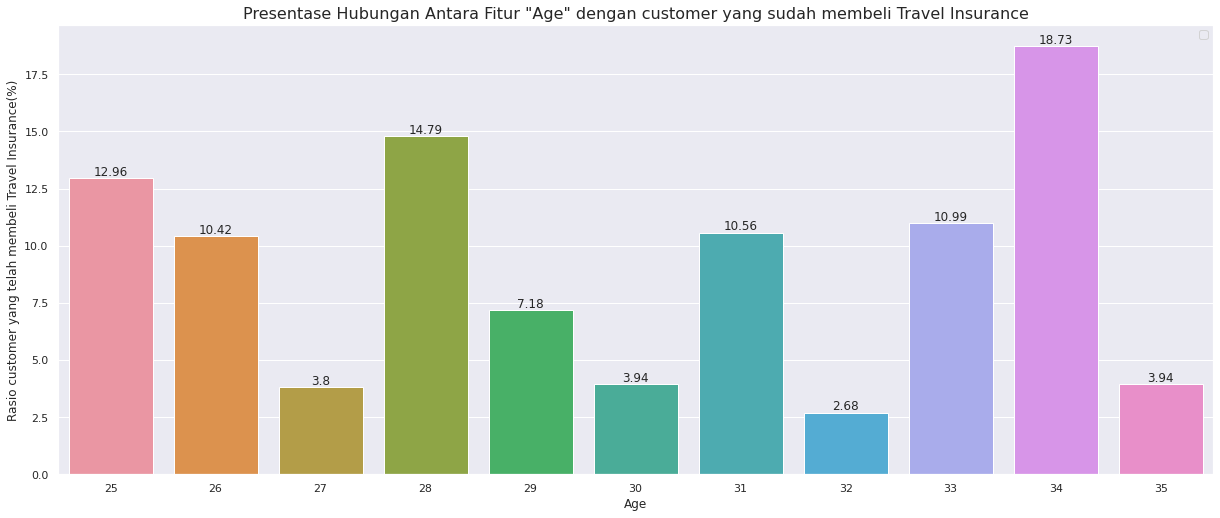

In [ ]:
# Visualisasi Persenan
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='Age', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_age_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "Age" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20.7,8.27)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance berada pada umur 34 tahun dengan 18,73% dari list customer yang terdaftar di travel insurance.

- Customer dengan umur 28 tahun merupakan customer mayoritas yang belum membeli travel insurance. Walaupun begitu dalam list customer yang terdaftar di travel insurance umur 28 tahun berada pada nomer ke-2 terbanyak, hal ini berarti customer dengan umur 28 tahun dapat menjadi target dengan jumlah yang besar karena memiliki populasi besar yang belum terjamah, namun memiliki ketertarikan terhadap travel insurance yang cukup tinggi.

- Top 3 jumlah terbanyak yang membeli travel insurance ada pada umur 34, 28, dan 25.


**2.EmploymentType Vs TravelInsurance**

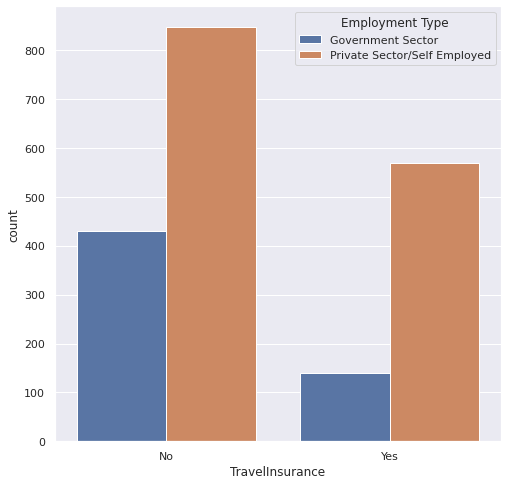

In [ ]:
df_travel_EmploymentType = df.copy()
df_travel_EmploymentType['TravelInsurance'] = df_travel_EmploymentType['TravelInsurance'].astype(str)
df_travel_EmploymentType['TravelInsurance'] = df_travel_EmploymentType['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_EmploymentType['Employment Type'] = df_travel_EmploymentType['Employment Type'].astype(str)
df_travel_EmploymentType['Employment Type'] = df_travel_EmploymentType['Employment Type'].replace(['0','1'], ['Government Sector','Private Sector/Self Employed'])

fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Employment Type',x='TravelInsurance',data=df_travel_EmploymentType)
plt.show()

In [ ]:
# Mencari rasio persenan
df_EmploymentType_travel = df.copy()
df_EmploymentType_travel = pd.pivot_table(df_EmploymentType_travel,
                              index=['Employment Type'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_EmploymentType_travel.columns =[0,1]
df_EmploymentType_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_EmploymentType_travel.drop([0],axis=1,inplace=True)
df_EmploymentType_travel.reset_index(inplace=True)
df_EmploymentType_travel['Total_Buy_Travel_Insurance'] = df_EmploymentType_travel['Buy_Travel_Insurance'].sum()
df_EmploymentType_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_EmploymentType_travel['Buy_Travel_Insurance']/(df_EmploymentType_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_EmploymentType_travel

,Employment Type,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,0,140,710,19.72
1,1,570,710,80.28


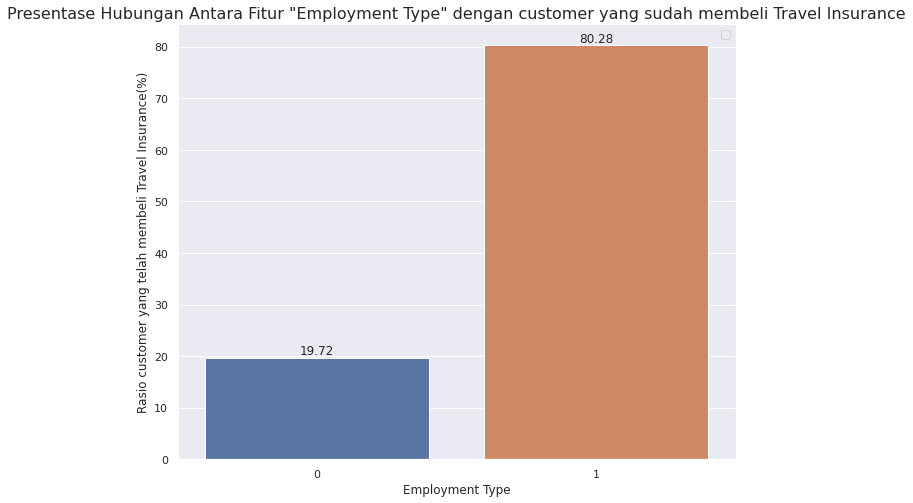

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='Employment Type', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_EmploymentType_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "Employment Type" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20.7,8.27)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance bekerja di private sector/Self Employed dengan persentase 80.28%. Hal ini berbanding terbalik dengan customer yang bekerja di pemerintahan atau government sector yang hanya 19,72% saja.Penyebab ketimpangan ini mungkin dikarenakan di customer yang bekerja di perusahaan swasta atau wirausaha cenderung lebih sering berpergian ketimbang yang bekerja di pemerintahan.

- Pada marketing campaign nantinya lebih baik difokuskan pada customer yang bekerja di perusahaan swasta atau yang bekerja sebagai wiraswasta.


**3.GraduateOrNot VS TravelInsurance**

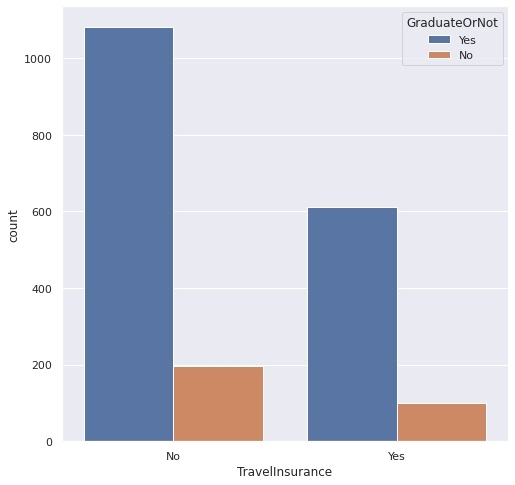

In [ ]:
df_travel_GraduateOrNot = df.copy()
df_travel_GraduateOrNot['TravelInsurance'] = df_travel_GraduateOrNot['TravelInsurance'].astype(str)
df_travel_GraduateOrNot['TravelInsurance'] = df_travel_GraduateOrNot['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_GraduateOrNot['GraduateOrNot'] = df_travel_GraduateOrNot['GraduateOrNot'].astype(str)
df_travel_GraduateOrNot['GraduateOrNot'] = df_travel_GraduateOrNot['GraduateOrNot'].replace(['0','1'], ['No','Yes'])


fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='GraduateOrNot',x='TravelInsurance',data=df_travel_GraduateOrNot)
plt.show()

In [ ]:
#Mencari rasio persenan
df_GraduateOrNot_travel = df.copy()
df_GraduateOrNot_travel = pd.pivot_table(df_GraduateOrNot_travel,
                              index=['GraduateOrNot'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_GraduateOrNot_travel.columns =[0,1]
df_GraduateOrNot_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_GraduateOrNot_travel.drop([0],axis=1,inplace=True)
df_GraduateOrNot_travel.reset_index(inplace=True)
df_GraduateOrNot_travel['Total_Buy_Travel_Insurance'] = df_GraduateOrNot_travel['Buy_Travel_Insurance'].sum()
df_GraduateOrNot_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_GraduateOrNot_travel['Buy_Travel_Insurance']/(df_GraduateOrNot_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_GraduateOrNot_travel

,GraduateOrNot,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,0,99,710,13.94
1,1,611,710,86.06


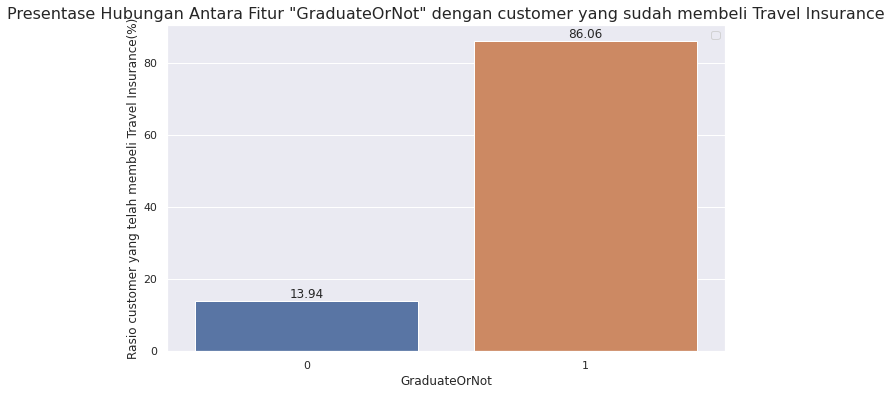

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='GraduateOrNot', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_GraduateOrNot_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "GraduateOrNot" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (10,8)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance belum lulus kuliah dengan persentase 86.06% dari list customer yang terdaftar di travel insurance.


- Pada marketing campaign nantinya tidak perlu spesifik menargetkan lulusan kuliah atau sajana, namun bisa lebih universal.


**4.AnnualIncome VS TravelInsurance**

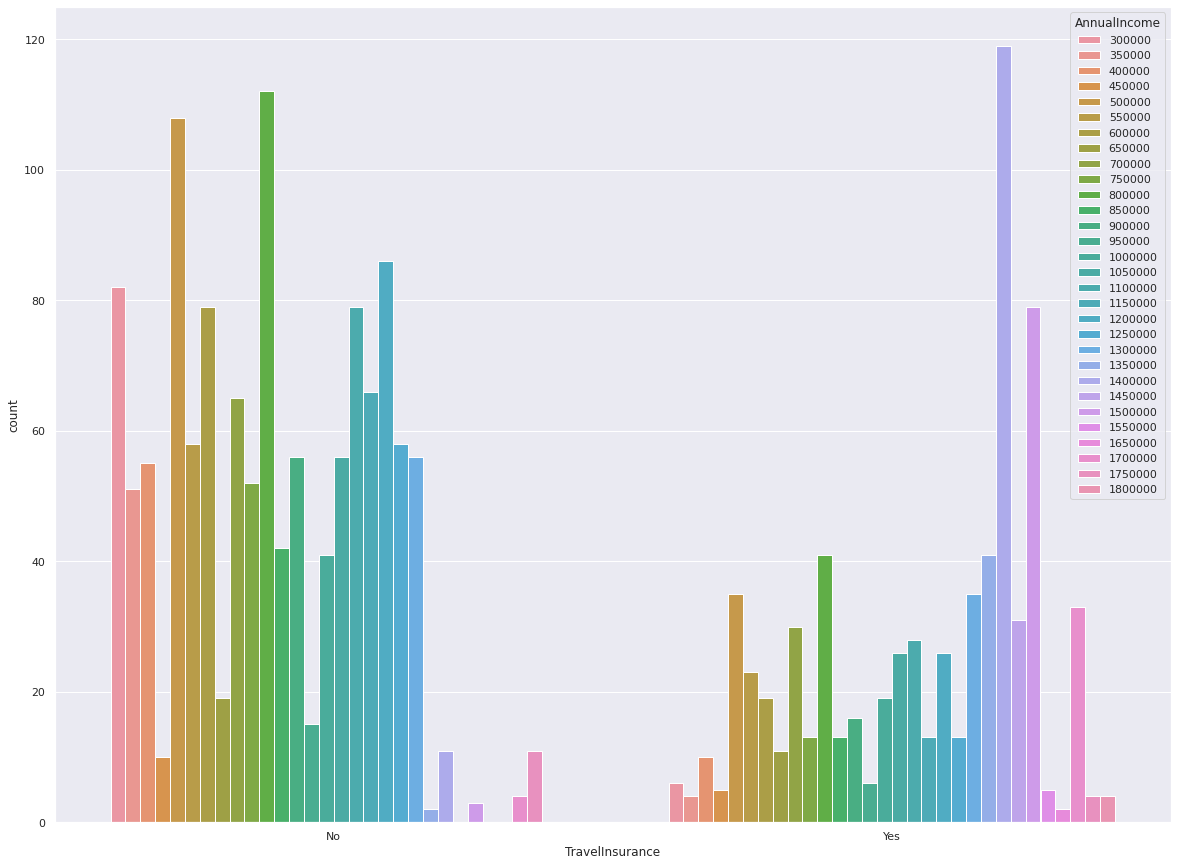

In [ ]:
df_travel_AnnualIncome = df.copy()

df_travel_AnnualIncome['TravelInsurance'] = df_travel_AnnualIncome['TravelInsurance'].astype(str)
df_travel_AnnualIncome['TravelInsurance'] = df_travel_AnnualIncome['TravelInsurance'].replace(['0','1'], ['No','Yes'])



fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='AnnualIncome',x='TravelInsurance',data=df_travel_AnnualIncome)
plt.show()

In [ ]:
#Mencari rasio persenan
df_AnnualIncome_travel = df.copy()
df_AnnualIncome_travel = pd.pivot_table(df_AnnualIncome_travel,
                              index=['AnnualIncome'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_AnnualIncome_travel.columns =[0,1]
df_AnnualIncome_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_AnnualIncome_travel.drop([0],axis=1,inplace=True)
df_AnnualIncome_travel.reset_index(inplace=True)
df_AnnualIncome_travel['Total_Buy_Travel_Insurance'] = df_AnnualIncome_travel['Buy_Travel_Insurance'].sum()
df_AnnualIncome_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_AnnualIncome_travel['Buy_Travel_Insurance']/(df_AnnualIncome_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_AnnualIncome_travel

,AnnualIncome,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,300000,6.0,710.0,0.85
1,350000,4.0,710.0,0.56
2,400000,10.0,710.0,1.41
3,450000,5.0,710.0,0.70
4,500000,35.0,710.0,4.93
5,550000,23.0,710.0,3.24
6,600000,19.0,710.0,2.68
7,650000,11.0,710.0,1.55
8,700000,30.0,710.0,4.23
9,750000,13.0,710.0,1.83


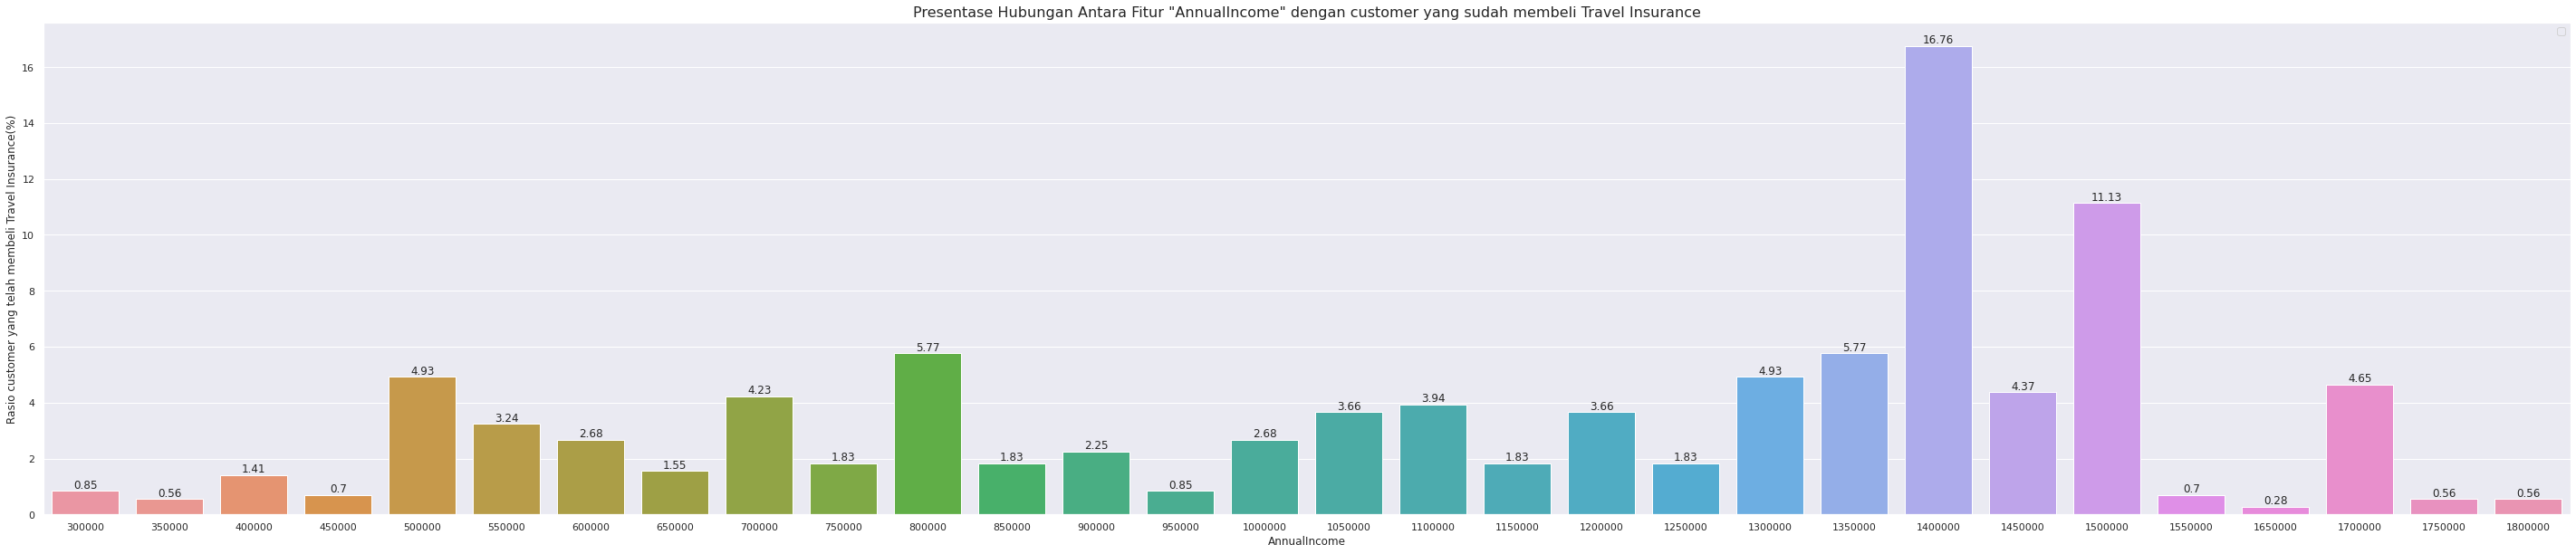

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='AnnualIncome', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_AnnualIncome_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "AnnualIncome" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (50,10)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

<AxesSubplot: xlabel='TravelInsurance', ylabel='AnnualIncome'>

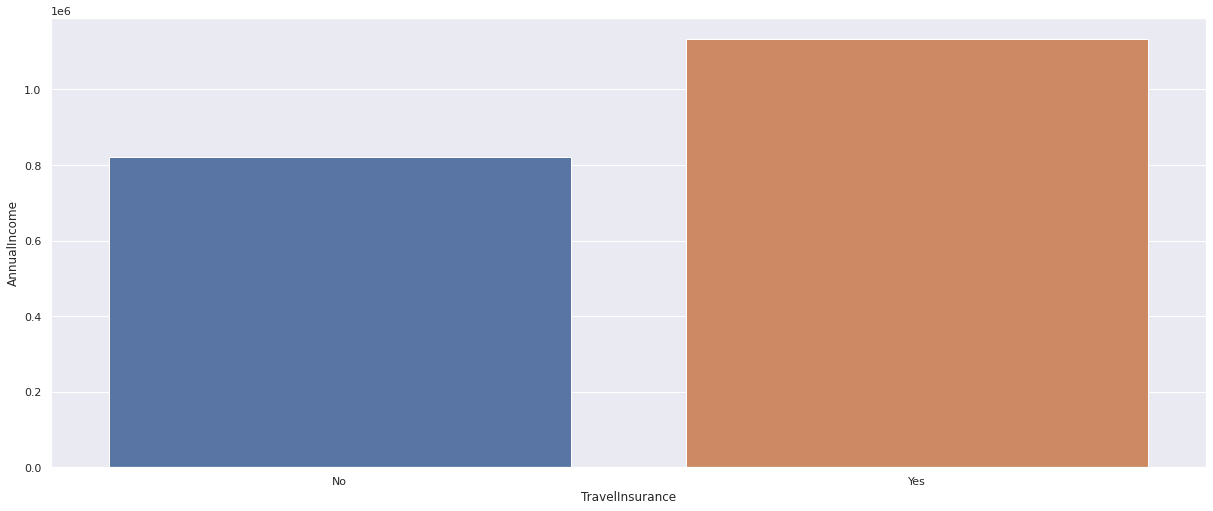

In [ ]:
sns.barplot(x='TravelInsurance',y='AnnualIncome',data=df_travel_AnnualIncome,ci=None)

**Intepretasi**

- Mayoritas customer yang membeli travel insurance berdasarkan grafik memiliki pendapatan yang lebih banyak ketimbang yang tidak.

- Mayoritas customer yang memiliki travel insurance memiliki pendapatan 1,4 juta dengan 16,76%.

- Customer yang pendapatan tahunannya lebih besar dari 1,3 juta telah membeli lebih banyak travel insurance daripada orang yang pendapatan tahunannya kurang dari 1,3 juta

- Pada saat marketing  sebaiknya terlebih dahulu melakukan profiling atas pendapatan yang dimiliki customer dan memprioritaskan pendapatan yang besar terlebih dahulu.


**5.FamilyMembers VS Travel Insurance**

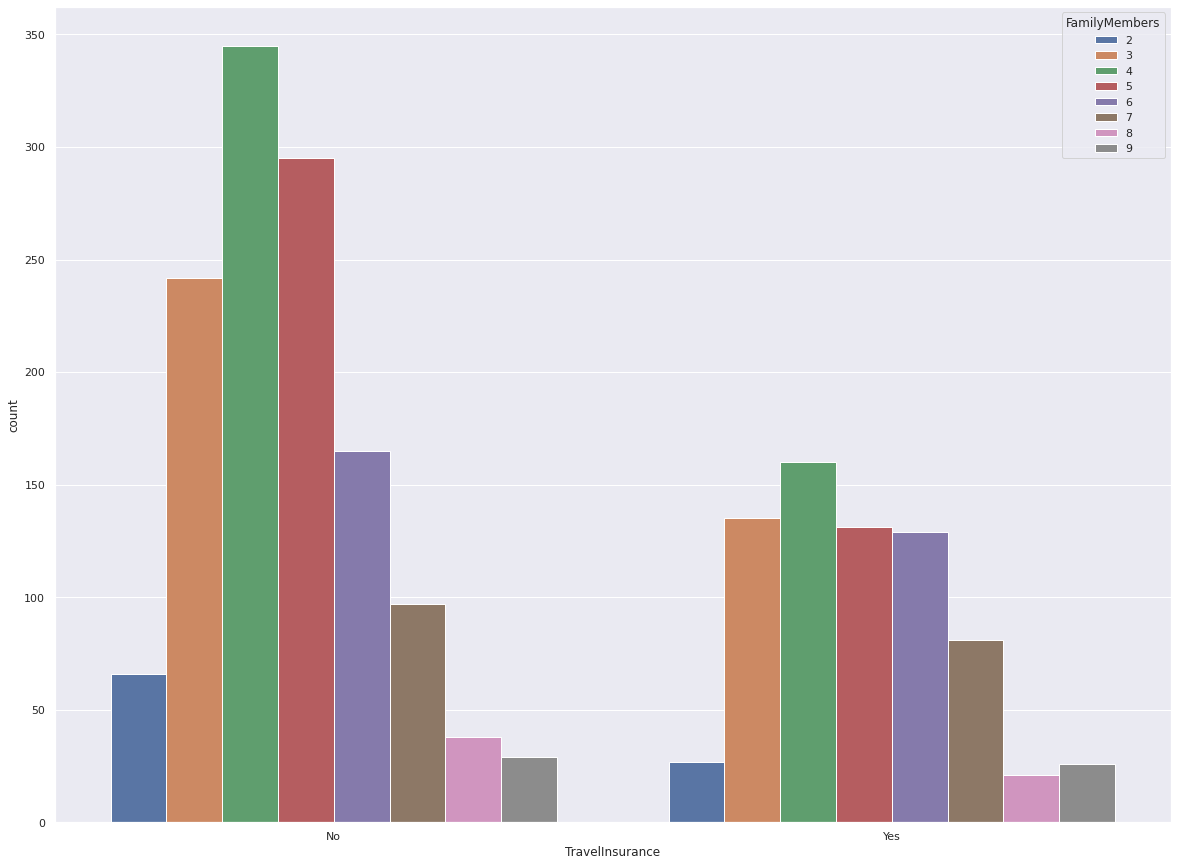

In [ ]:
#Countplot
df_travel_FamilyMembers = df.copy()

df_travel_FamilyMembers['TravelInsurance'] = df_travel_FamilyMembers['TravelInsurance'].astype(str)
df_travel_FamilyMembers['TravelInsurance'] = df_travel_FamilyMembers['TravelInsurance'].replace(['0','1'], ['No','Yes'])


fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='FamilyMembers',x='TravelInsurance',data=df_travel_FamilyMembers)
plt.show()

In [ ]:
#Mencari rasio persenan
df_FamilyMembers_travel = df.copy()
df_FamilyMembers_travel = pd.pivot_table(df_FamilyMembers_travel,
                              index=['FamilyMembers'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_FamilyMembers_travel.columns =[0,1]
df_FamilyMembers_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_FamilyMembers_travel.drop([0],axis=1,inplace=True)
df_FamilyMembers_travel.reset_index(inplace=True)
df_FamilyMembers_travel['Total_Buy_Travel_Insurance'] = df_FamilyMembers_travel['Buy_Travel_Insurance'].sum()
df_FamilyMembers_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_FamilyMembers_travel['Buy_Travel_Insurance']/(df_FamilyMembers_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_FamilyMembers_travel

,FamilyMembers,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,2,27,710,3.80
1,3,135,710,19.01
2,4,160,710,22.54
3,5,131,710,18.45
4,6,129,710,18.17
5,7,81,710,11.41
6,8,21,710,2.96
7,9,26,710,3.66


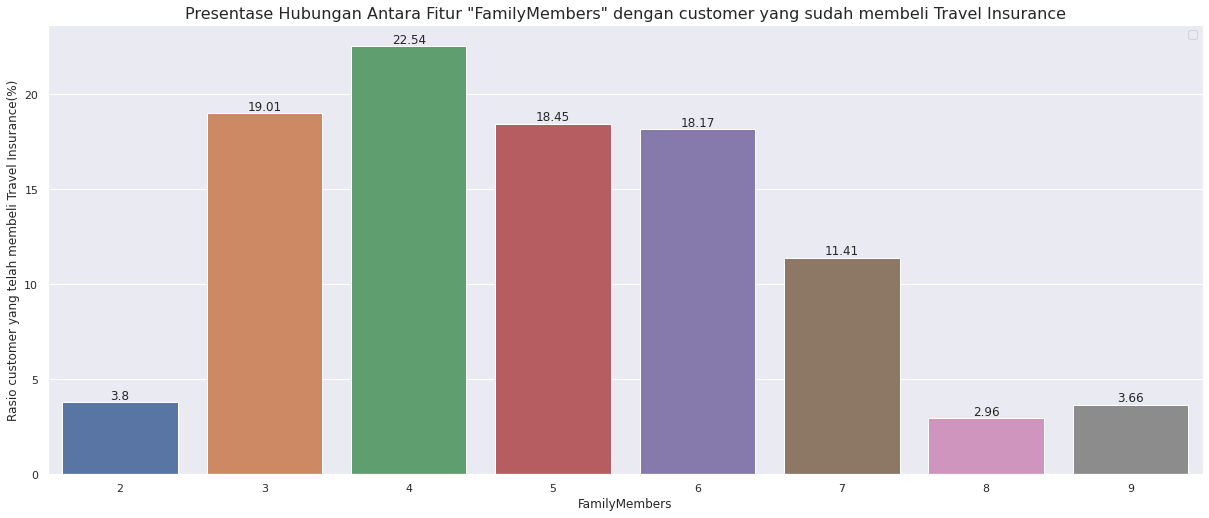

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='FamilyMembers', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_FamilyMembers_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "FamilyMembers" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20,30)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance memiliki jumlah anggota keluarga 4 orang dengan presentase 22.54%

- Dapat disimpulkan bahwa jumlah anggota keluarga tidak terlalu berpengaruh terhadap travel insurance  karena rasionya hampir sama. Namun, keluarga yang beranggotakan 8 hingga 9 orang tidak membeli banyak travel insurance dibandingkan keluarga lainnya

**6.ChronicDiseasses VS Travel Insurance**

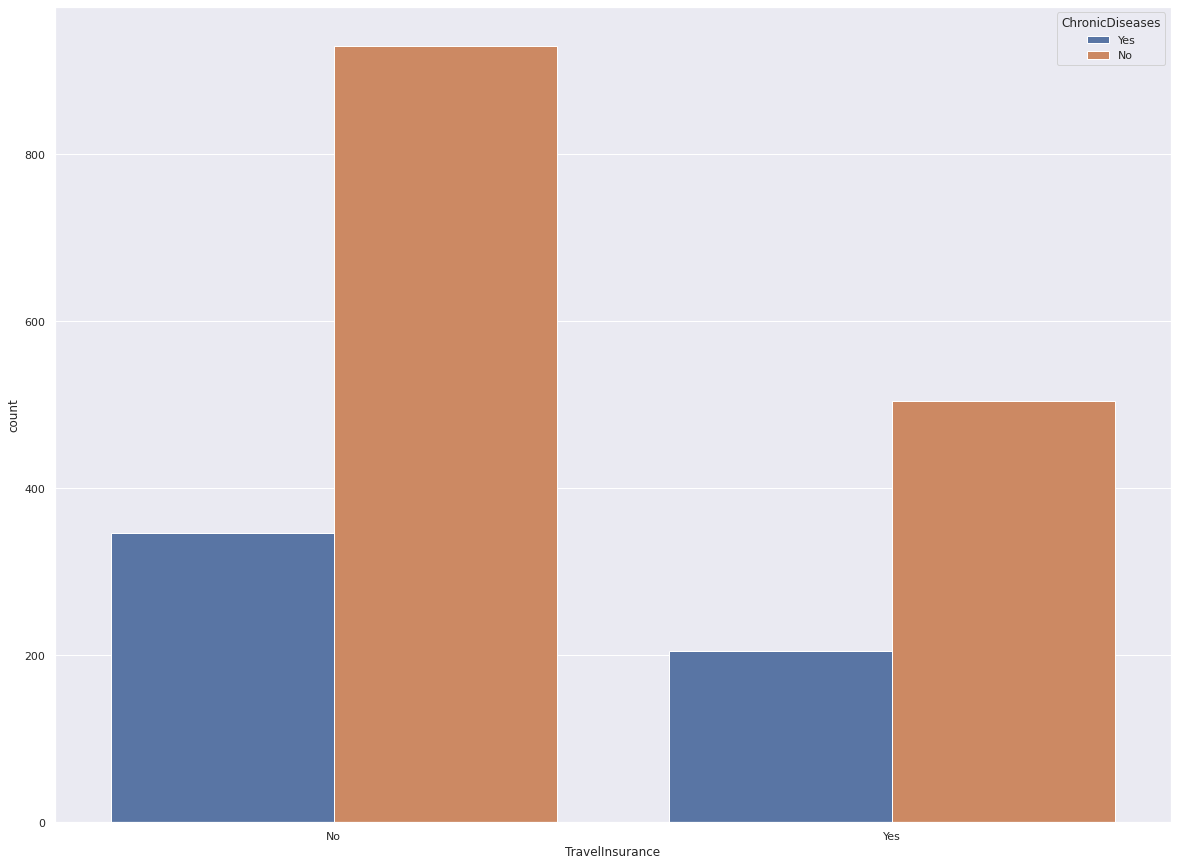

In [ ]:
#Countplot
df_travel_ChronicDiseasses = df.copy()

df_travel_ChronicDiseasses['TravelInsurance'] = df_travel_ChronicDiseasses['TravelInsurance'].astype(str)
df_travel_ChronicDiseasses['TravelInsurance'] = df_travel_ChronicDiseasses['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_ChronicDiseasses['ChronicDiseases'] = df_travel_ChronicDiseasses['ChronicDiseases'].astype(str)
df_travel_ChronicDiseasses['ChronicDiseases'] = df_travel_ChronicDiseasses['ChronicDiseases'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='ChronicDiseases',x='TravelInsurance',data=df_travel_ChronicDiseasses)
plt.show()

In [ ]:
#Mencari rasio persenan
df_ChronicDisseases_travel = df.copy()
df_ChronicDisseases_travel = pd.pivot_table(df_ChronicDisseases_travel,
                              index=['ChronicDiseases'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_ChronicDisseases_travel.columns =[0,1]
df_ChronicDisseases_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_ChronicDisseases_travel.drop([0],axis=1,inplace=True)
df_ChronicDisseases_travel.reset_index(inplace=True)
df_ChronicDisseases_travel['Total_Buy_Travel_Insurance'] = df_ChronicDisseases_travel['Buy_Travel_Insurance'].sum()
df_ChronicDisseases_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_ChronicDisseases_travel['Buy_Travel_Insurance']/(df_ChronicDisseases_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_ChronicDisseases_travel

,ChronicDiseases,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,0,505,710,71.13
1,1,205,710,28.87


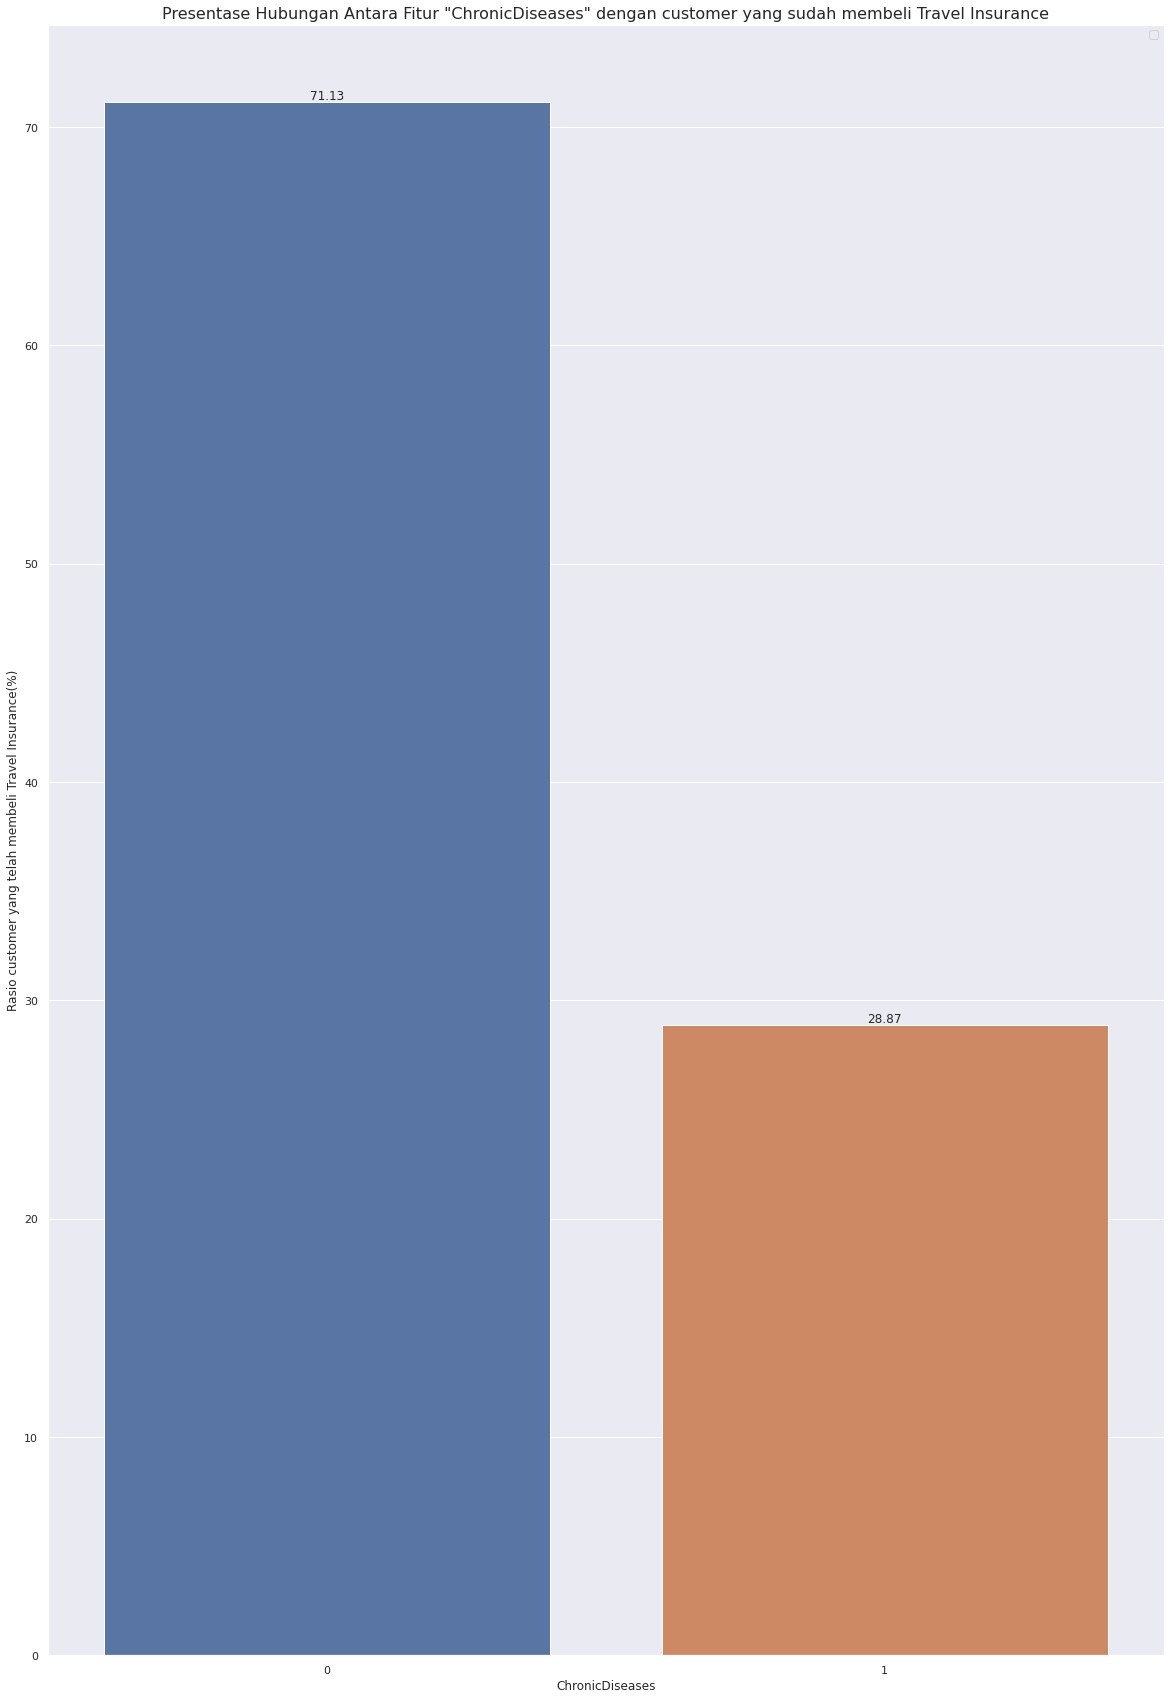

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='ChronicDiseases', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_ChronicDisseases_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "ChronicDiseases" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20,30)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance tidak memiliki penyakit kronis dengan rasio 71.13%

- Dari grafik di atas kita dapat berasumsi bahwa penyakit kurang berdampak pada pembelian asuransi perjalanan atau tidak.

**7.FrequentFlyer VS Travel Insurance**

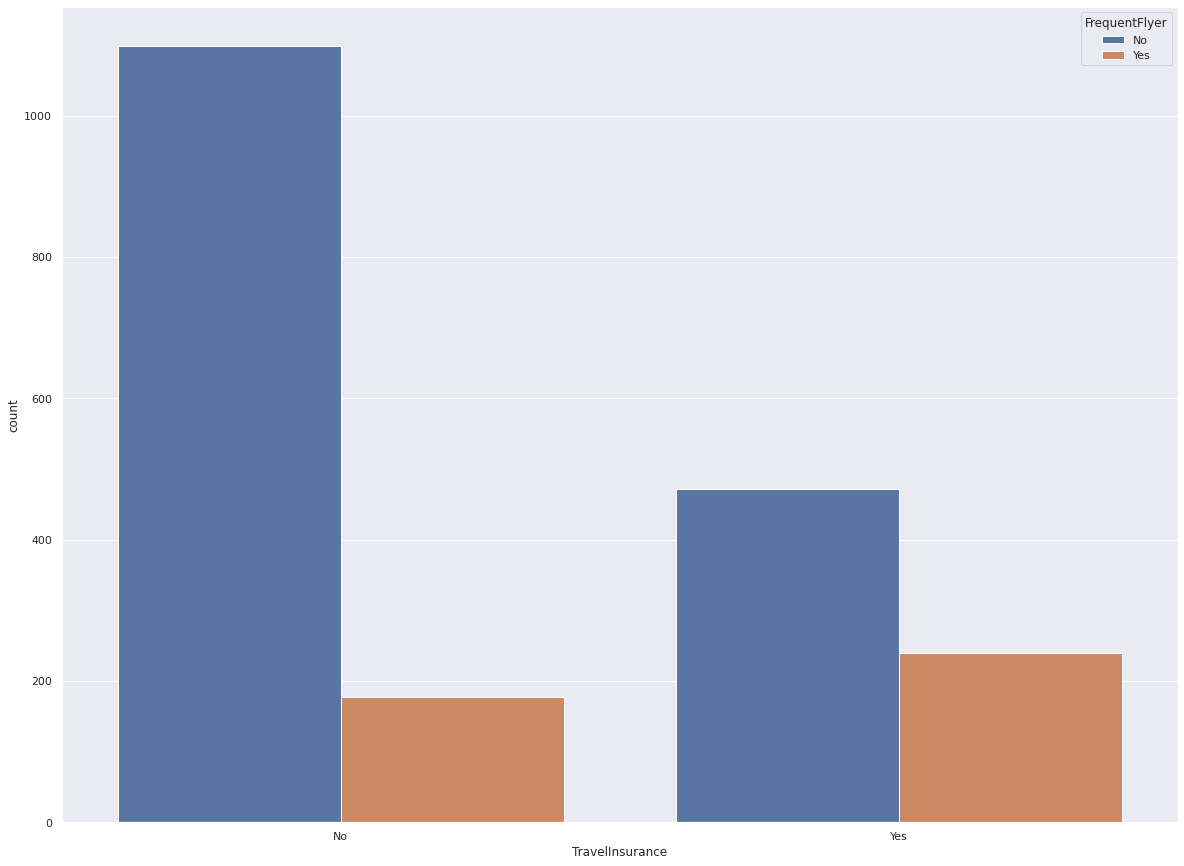

In [ ]:
#Countplot
df_travel_FrequentFlyer = df.copy()

df_travel_FrequentFlyer['TravelInsurance'] = df_travel_FrequentFlyer['TravelInsurance'].astype(str)
df_travel_FrequentFlyer['TravelInsurance'] = df_travel_FrequentFlyer['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_FrequentFlyer['FrequentFlyer'] = df_travel_FrequentFlyer['FrequentFlyer'].astype(str)
df_travel_FrequentFlyer['FrequentFlyer'] = df_travel_FrequentFlyer['FrequentFlyer'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='FrequentFlyer',x='TravelInsurance',data=df_travel_FrequentFlyer)
plt.show()

In [ ]:
#Mencari rasio persenan
df_FrequentFlyer_travel = df.copy()
df_FrequentFlyer_travel = pd.pivot_table(df_FrequentFlyer_travel,
                              index=['FrequentFlyer'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_FrequentFlyer_travel.columns =[0,1]
df_FrequentFlyer_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_FrequentFlyer_travel.drop([0],axis=1,inplace=True)
df_FrequentFlyer_travel.reset_index(inplace=True)
df_FrequentFlyer_travel['Total_Buy_Travel_Insurance'] = df_FrequentFlyer_travel['Buy_Travel_Insurance'].sum()
df_FrequentFlyer_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_FrequentFlyer_travel['Buy_Travel_Insurance']/(df_FrequentFlyer_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_FrequentFlyer_travel

,FrequentFlyer,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,0,471,710,66.34
1,1,239,710,33.66


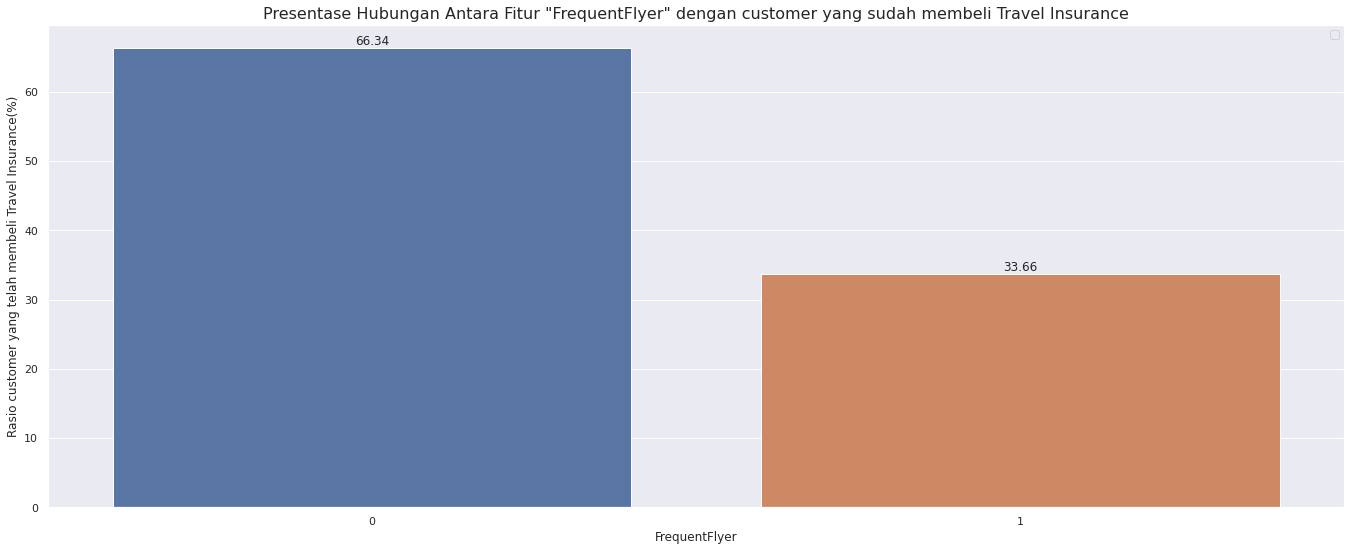

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='FrequentFlyer', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_FrequentFlyer_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "FrequentFlyer" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (50,10)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

In [ ]:
px.histogram(df, 
             x='FrequentFlyer', 
             color='TravelInsurance', 
             color_discrete_map={1:'green', 0:'blue'}, 
             title='Peran hubungan Ever Traveled Abroad dengan Travel Insurance',
            )  

**Intepretasi**

- Customer yang tidak sering melakukan penerbangan memiliki rasio untuk membeli travel insurance lebih besar dengan rasio sekitar 66.34%.

- Customer yang sering travel menggunakan pesawat lebih cenderung membeli asuransi perjalanan sedangkan ada sebagian kecil customer yang tidak sering travel menggunakan pesawat tetapi masih memiliki travel insurance.



**8.EverTravelledAbroad VS Travel Insurance**

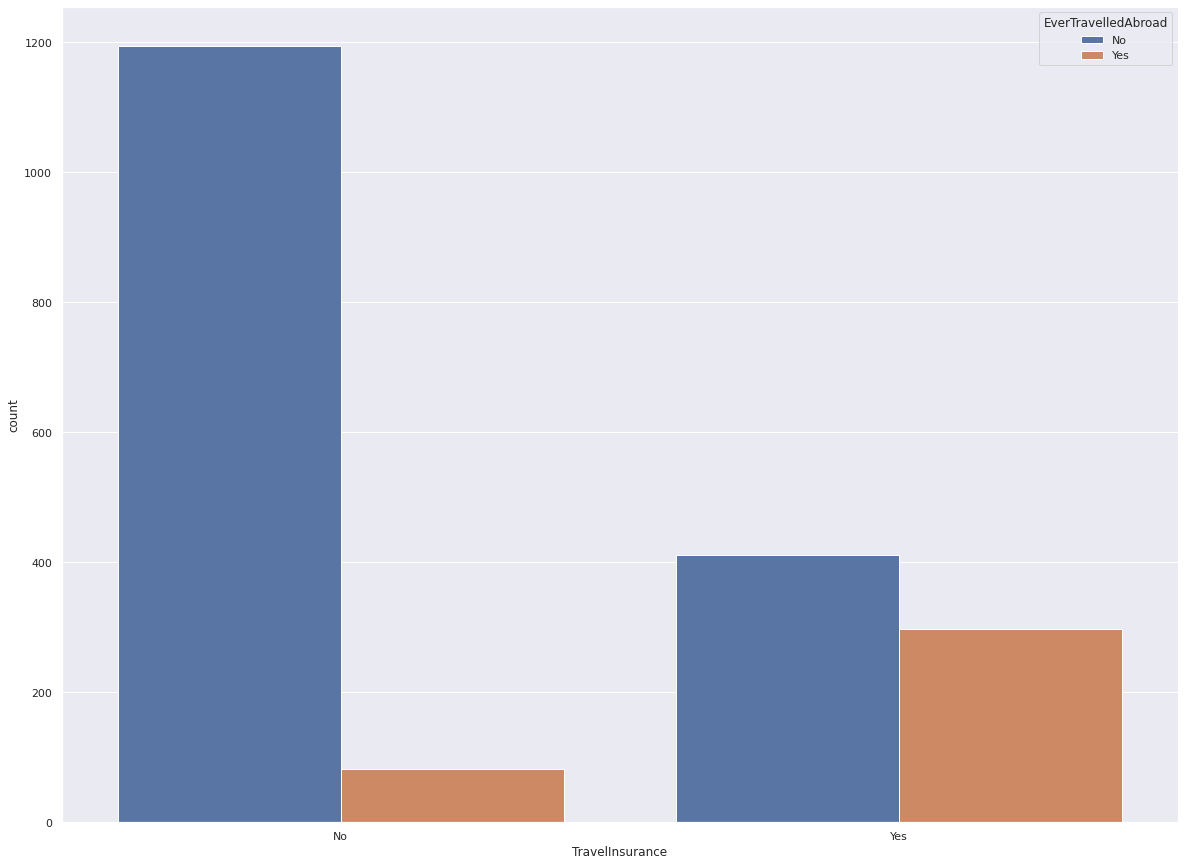

In [ ]:
#Countplot
df_travel_EverTravelledAbroad = df.copy()

df_travel_EverTravelledAbroad['TravelInsurance'] = df_travel_EverTravelledAbroad['TravelInsurance'].astype(str)
df_travel_EverTravelledAbroad['TravelInsurance'] = df_travel_EverTravelledAbroad['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_EverTravelledAbroad['EverTravelledAbroad'] = df_travel_EverTravelledAbroad['EverTravelledAbroad'].astype(str)
df_travel_EverTravelledAbroad['EverTravelledAbroad'] = df_travel_EverTravelledAbroad['EverTravelledAbroad'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='EverTravelledAbroad',x='TravelInsurance',data=df_travel_EverTravelledAbroad)
plt.show()

In [ ]:
#Mencari rasio persenan
df_EverTravelledAbroad_travel = df.copy()
df_EverTravelledAbroad_travel = pd.pivot_table(df_EverTravelledAbroad_travel,
                              index=['EverTravelledAbroad'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_EverTravelledAbroad_travel.columns =[0,1]
df_EverTravelledAbroad_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_EverTravelledAbroad_travel.drop([0],axis=1,inplace=True)
df_EverTravelledAbroad_travel.reset_index(inplace=True)
df_EverTravelledAbroad_travel['Total_Buy_Travel_Insurance'] = df_EverTravelledAbroad_travel['Buy_Travel_Insurance'].sum()
df_EverTravelledAbroad_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_EverTravelledAbroad_travel['Buy_Travel_Insurance']/(df_EverTravelledAbroad_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_EverTravelledAbroad_travel

,EverTravelledAbroad,Buy_Travel_Insurance,Total_Buy_Travel_Insurance,Rasio customer yang telah membeli Travel Insurance(%)
0,0,412,710,58.03
1,1,298,710,41.97


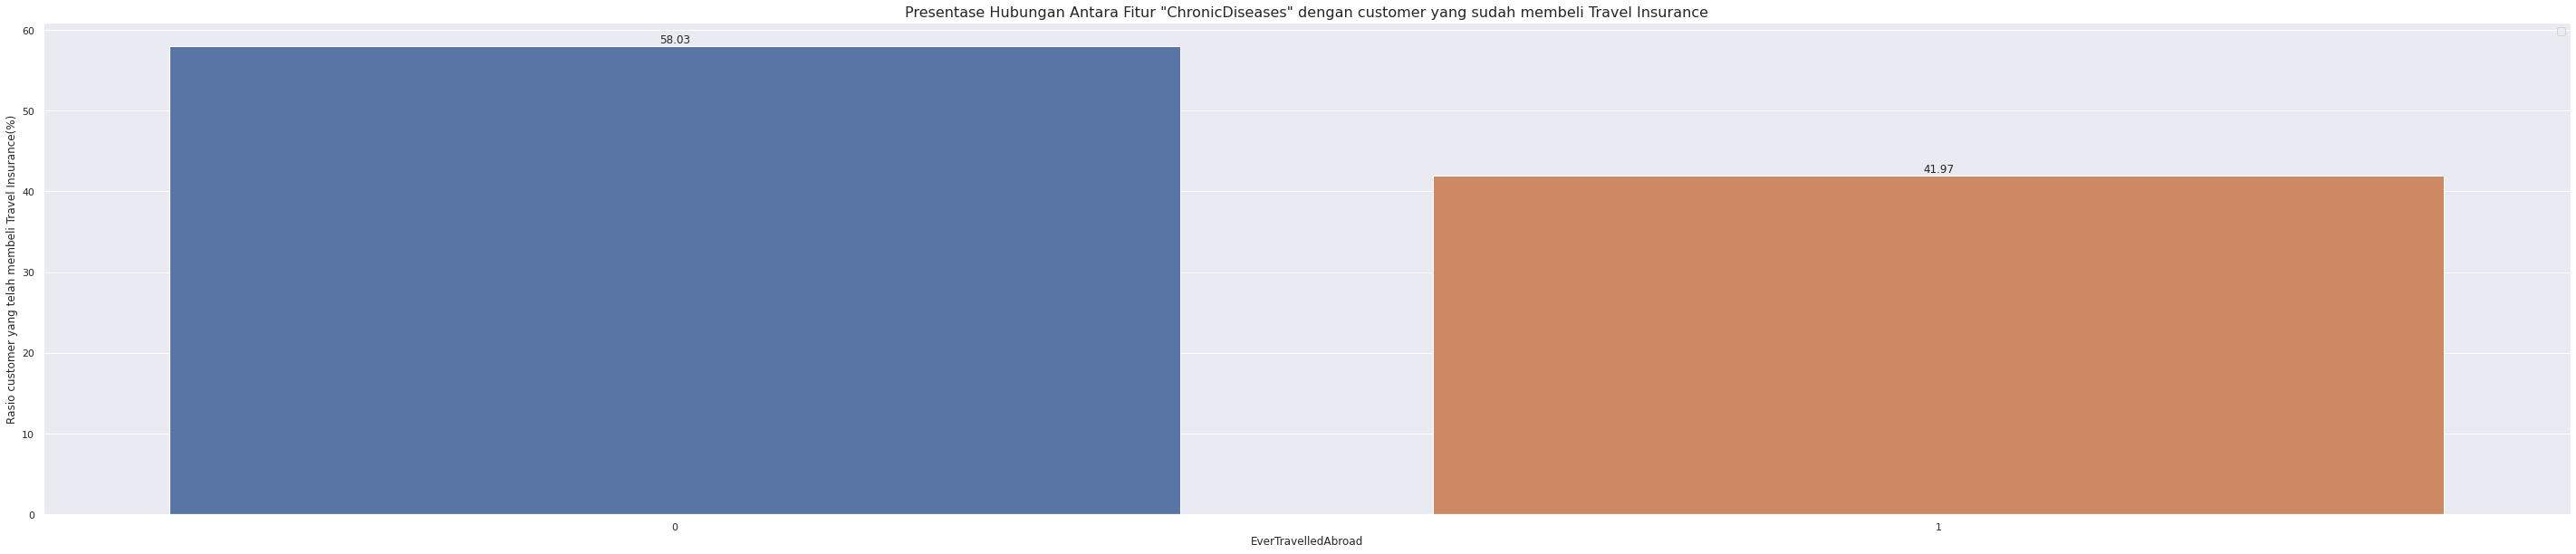

In [ ]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='EverTravelledAbroad', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_EverTravelledAbroad_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "Ever Travelled Abroad" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (50,10)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

In [ ]:
px.histogram(df, 
             x='EverTravelledAbroad', 
             color='TravelInsurance', 
             color_discrete_map={1:'green', 0:'blue'}, 
             title='Peran hubungan Ever Traveled Abroad dengan Travel Insurance',
             
            )

**Intepretasi**

- Mayoritas orang telah bepergian ke luar negeri dan membeli asuransi memiliki persentase 58.03 %.

- Seperti yang kita ketahui, bahwa mayoritas masyarakat yang belum bepergian ke luar negeri dan belum membeli asuransi. Jadi satu hal yang dapat kita asumsikan bahwa orang yang belum bepergian ke luar negeri tidak memerlukan travel insurance saat bepergian di dalam negara yang sama. 

**B. Feature VS Feature yang berkemunginan memilike indirect impact terhadap pembelian Travel Insurance** 

**1. AnnualIncome VS EmploymentType**

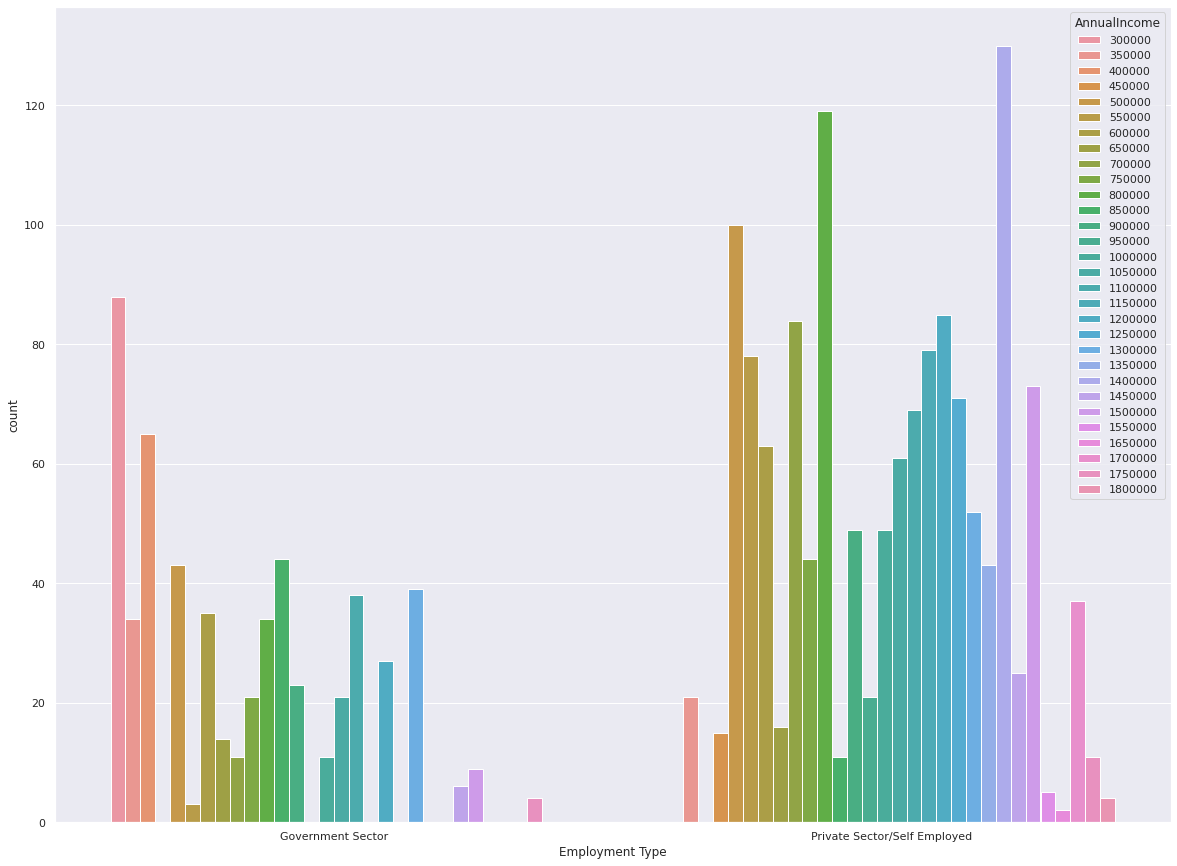

In [ ]:
#Countplot
df_AnnualIncome_EmploymentType = df.copy()
df_AnnualIncome_EmploymentType['Employment Type'] = df_AnnualIncome_EmploymentType['Employment Type'].astype(str)
df_AnnualIncome_EmploymentType['Employment Type'] = df_AnnualIncome_EmploymentType['Employment Type'].replace(['0','1'], ['Government Sector','Private Sector/Self Employed'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='AnnualIncome',x='Employment Type',data=df_AnnualIncome_EmploymentType)
plt.show()

**Intepretasi**

Berdasarkan grafik dapat diambil kesimpulan bahwa customer yang bekerja di private sector (perusahaan swasta) /self employed (wiraswasta) cenderung memiliki penghasilan yang lebih besar ketimbang yang bekerja di pemerintahan atau goverment sector.

**2. AnnualIncome VS EvertravelledAbroad**

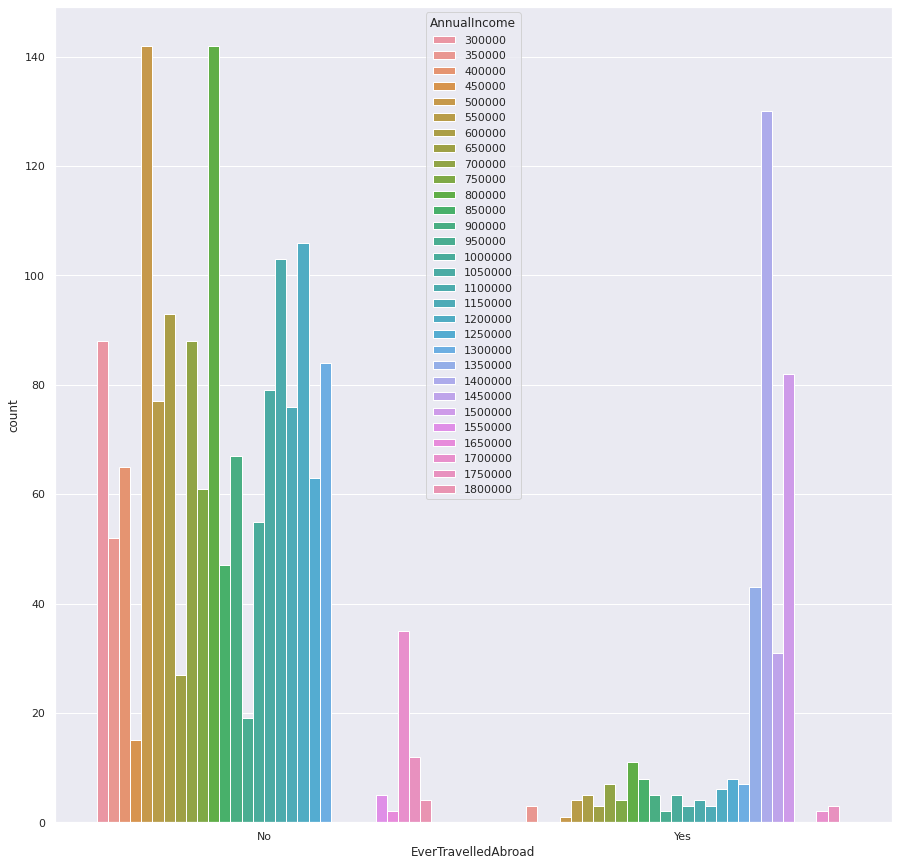

In [ ]:
#Countplot
df_AnnualIncome_EverTravelledAbroad = df.copy()
df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'] = df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'].astype(str)
df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'] = df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hue='AnnualIncome',x='EverTravelledAbroad',data=df_AnnualIncome_EverTravelledAbroad)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat diambil kesimpulan bahwa jumlah penghasilan tidak terlalu menentukan apakah customer pernah travel keluar negeri atau tidak. Walaupun begitu, dapat terlihat bahwa masyarakat dengan penghasilan dibawah 1.400.000 rupee cenderung tidak pernah travel ke luar negeri.

**3.AnnualIncome vs FrequentFlyer**

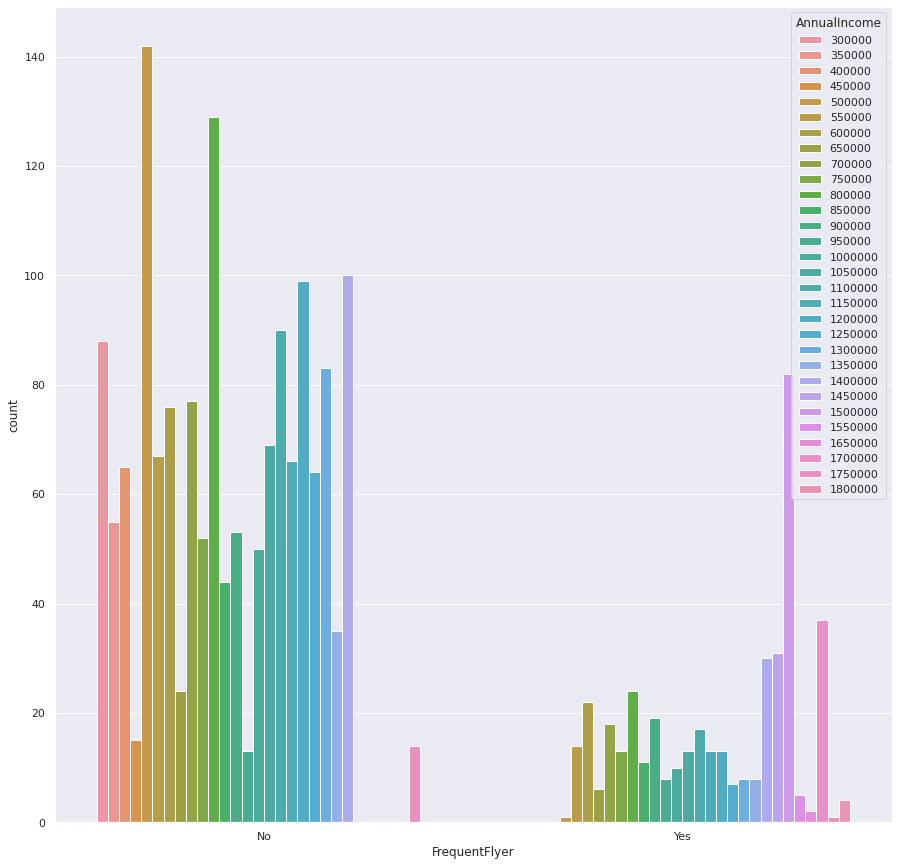

In [ ]:
#Countplot
df_AnnualIncome_FrequentFlyer = df.copy()
df_AnnualIncome_FrequentFlyer['FrequentFlyer'] = df_AnnualIncome_FrequentFlyer['FrequentFlyer'].astype(str)
df_AnnualIncome_FrequentFlyer['FrequentFlyer'] = df_AnnualIncome_FrequentFlyer['FrequentFlyer'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hue='AnnualIncome',x='FrequentFlyer',data=df_AnnualIncome_FrequentFlyer)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat diambil kesimpulan bahwa jumlah penghasilan juga tidak terlalu menentukan apakah customer akan sering travel menggunakan pesawat atau tidak. Walaupun begitu dapat terlihat bahwa masyarakat dengan penghasilan dibawah 450.000 rupee cenderung tidak sering travel menggunakan pesawat.

**4. AnnualIncome VS FamilyMembers**

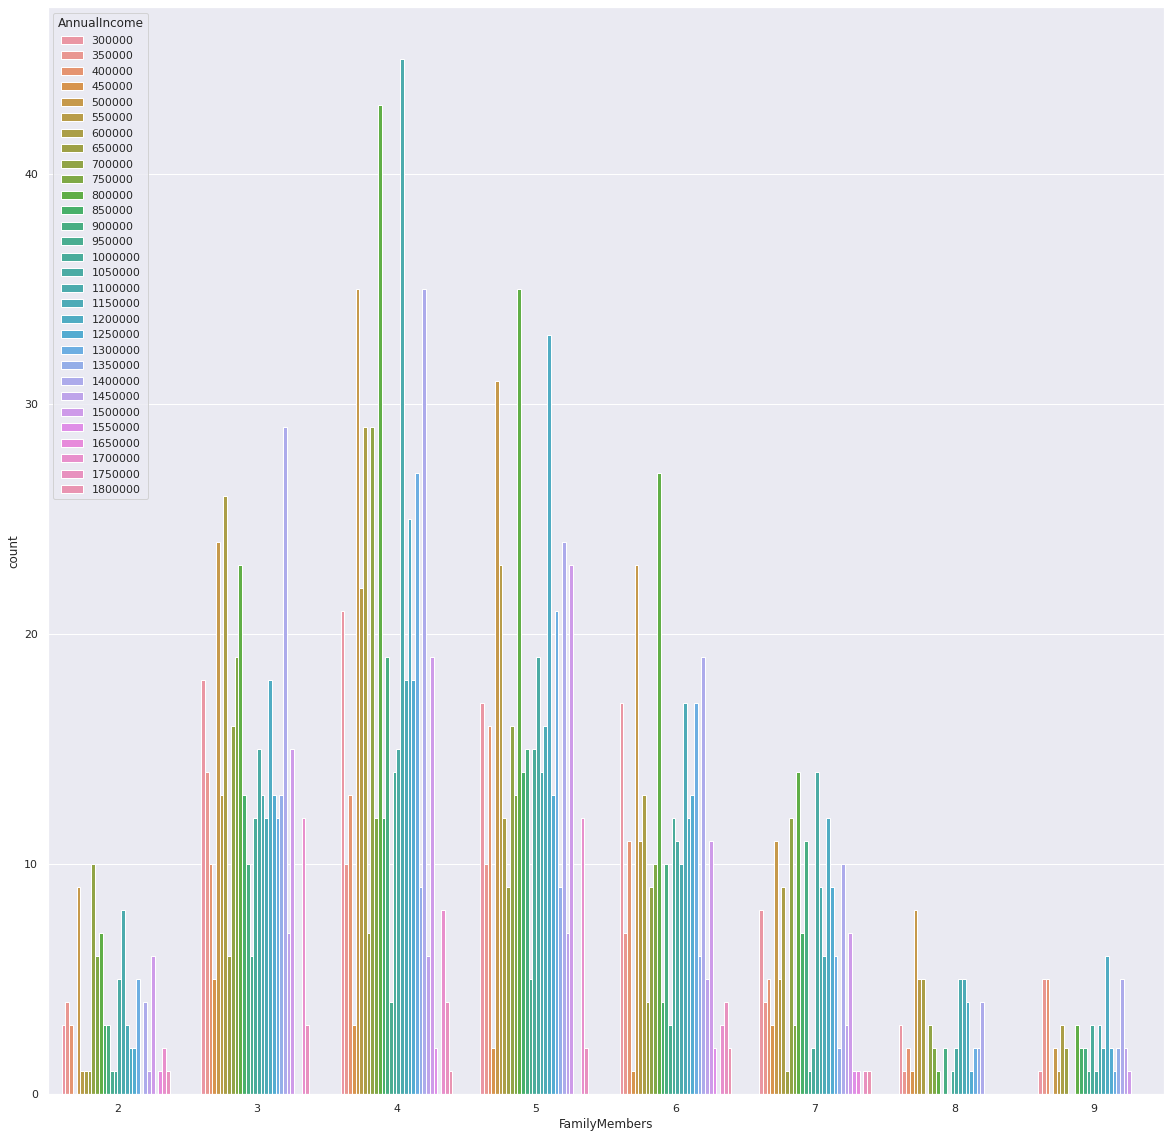

In [ ]:
#Countplot
fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(hue='AnnualIncome',x='FamilyMembers',data=df)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat terlihat bahwa customer dengan penghasilan terbesaar atau diatas 1,3 juta mayoritas memiliki 4 anggota keluarga. Berdasarkan hal ini mungkin bisa dilihat income/capita tiap customer.

**5.EverTravelledAbroad VS FrequentFlyer**

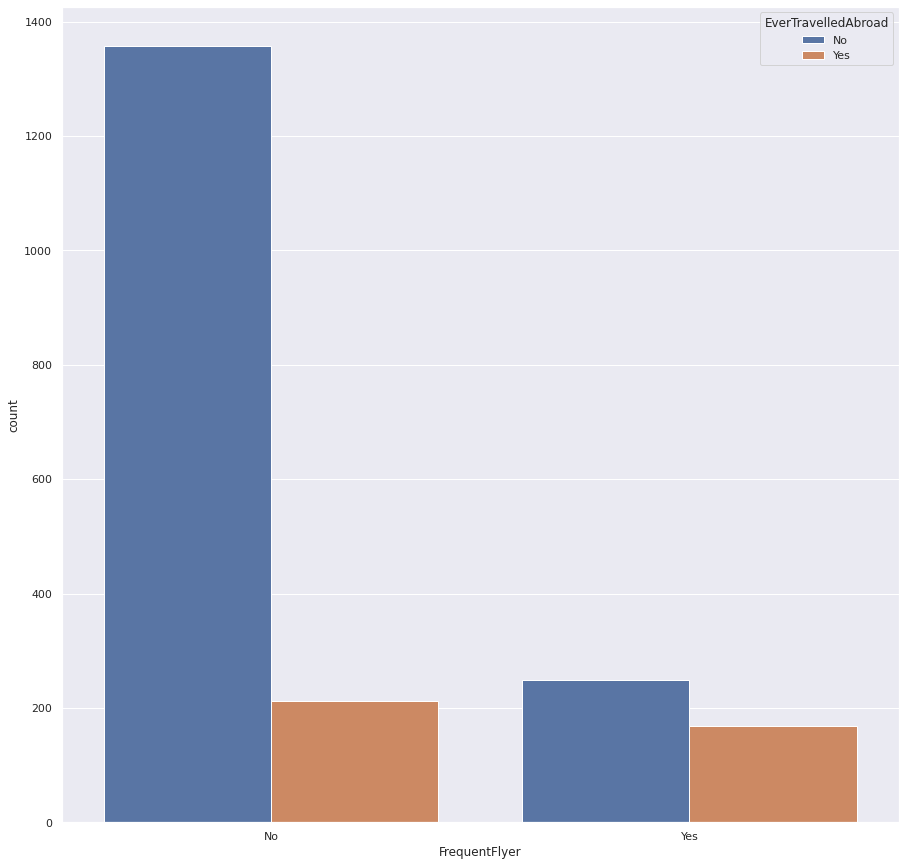

In [ ]:
#Countplot
df_EverTravelledAbroad_FrequentFlyer = df.copy()
df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'] = df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'].astype(str)
df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'] = df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'].astype(str)
df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'] = df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'].replace(['0','1'], ['No','Yes'])
df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'] = df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'].replace(['0','1'], ['No','Yes'])
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hue='EverTravelledAbroad',x='FrequentFlyer',data=df_EverTravelledAbroad_FrequentFlyer)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat dilihat bahwa orang yang sering menggunakan bepergian menggunakan pesawat hampir setengahnya pernah berpergian  menggunakan pesawat. Walaupun begitu, mayoritas customer yang sering bepergian menggunakan pesawat belum pernah ke luar negeri.

**A. Korelasi masing-masing feature dan label :**


Usulan feature yang perlu dipertahankan :
- Annual Income
- Ever Travelled Abroad
- Frequent Flyer
- Employment Type
- Family Member
- Age


**B.Korelasi antar feature**:
- Tidak ada fitur yang redundant
- Mungkin bisa melakukan Feature Extraction antara family member dan annual income karena bisa menjadi sumber insight baru yakni Income per- capita.

### Business Insight 

**Segmentasi untuk Melihat dan Membaca Business Insight**

In [ ]:
def segment(x):
    if x['AnnualIncome'] < 900000:
        segment = 'Low'
    elif x['AnnualIncome'] <= 1250000 and x['AnnualIncome'] >= 900000:
        segment = 'Mid'
    else:
        segment = 'High'
    return segment

df['segment'] = df.apply(lambda x: segment(x), axis=1)

**Plot rasio pada EverTravelled Abroad dan Annual Income terhadap Travel Insurance**

In [ ]:
p = df.groupby(['EverTravelledAbroad', 'segment', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi'] = p['EverTravelledAbroad'] + '-' + p['segment'].astype(str)

pp = p.groupby(['Combinasi', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi', 'TravelInsurance'])
pppp

,Combinasi,TravelInsurance,rasio,index
0,No-High,0,45.774648,65
1,No-High,1,54.225352,77
2,No-Low,0,78.372352,703
3,No-Low,1,21.627648,194
4,No-Mid,0,75.176056,427
5,No-Mid,1,24.823944,141
6,Yes-High,0,7.382550,22
7,Yes-High,1,92.617450,276
8,Yes-Low,0,65.217391,30
9,Yes-Low,1,34.782609,16


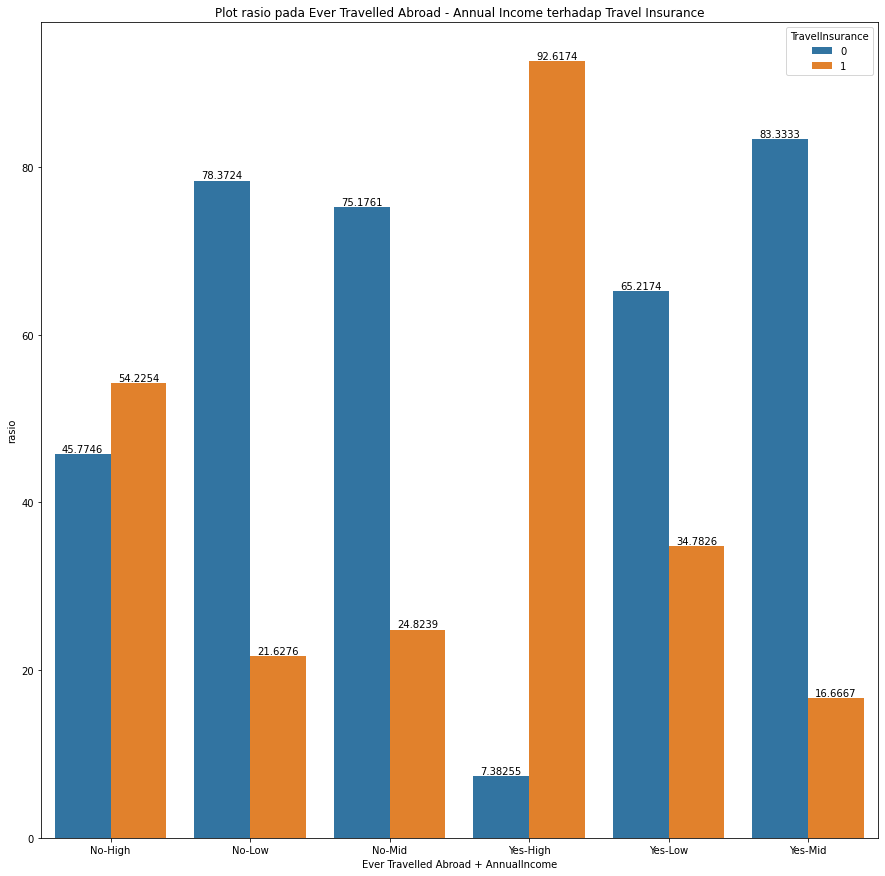

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x='Combinasi', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('Ever Travelled Abroad + AnnualIncome')
plt.title('Plot rasio pada Ever Travelled Abroad - Annual Income terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

- Dengan menggunakan multi barplot dari fitur yang dipilih menggunakan heatmap, kita mendapatkan gambaran bahwasanya:4

- Orang-orang yang pernah berpergian ke luar negeri dan memiliki penghasilan yang tinggi(setelah dilakukan segmentasi) memiliki kecenderungan yang paling tinggi untuk membeli travel insurance, diikuti dengan mereka yang tidak pernah ke luar negeri dan memiliki penghasilan tinggi.


**Plot rasio pada FrequentFlyer dan Annual Income terhadap Travel Insurance**

In [ ]:
p = df.groupby(['FrequentFlyer', 'segment', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi'] = p['FrequentFlyer'] + '-' + p['segment'].astype(str)

pp = p.groupby(['Combinasi', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi', 'TravelInsurance'])
pppp

,Combinasi,TravelInsurance,rasio,index
0,No-High,0,30.172414,70
1,No-High,1,69.827586,162
2,No-Low,0,77.937650,650
3,No-Low,1,22.062350,184
4,No-Mid,0,75.198413,379
5,No-Mid,1,24.801587,125
6,Yes-High,0,8.173077,17
7,Yes-High,1,91.826923,191
8,Yes-Low,0,76.146789,83
9,Yes-Low,1,23.853211,26


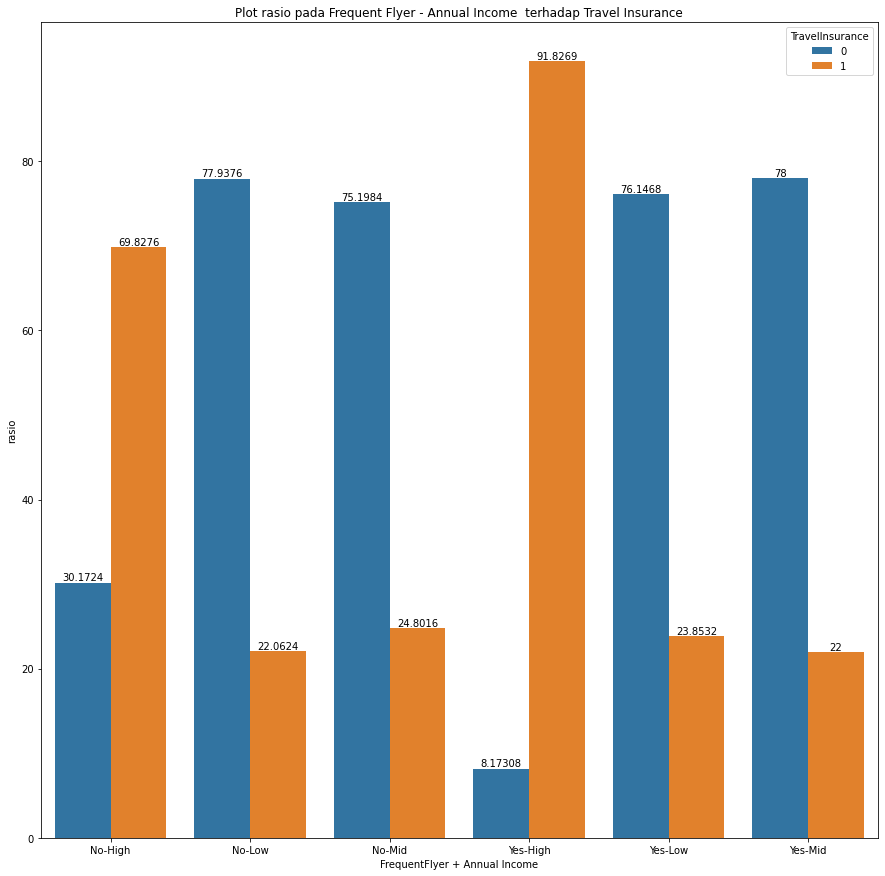

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x='Combinasi', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('FrequentFlyer + Annual Income')
plt.title('Plot rasio pada Frequent Flyer - Annual Income  terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

Dari plot di samping dapat dilihat bahwasanya orang-orang yang sering terbang dan berasal dari segment pendapatan yang tinggi memiliki kecenderungan untuk membeli travel insurance dibanding mereka yang sering terbang tetapi berasal dari segment pendapatan low atau mid, bahkan yang berasal dari segment low punya kecenderungan untuk membeli travel insurance daripada orang-orang yang sering terbang dan berasal dari segment pendapatan mid.


**Plot rasio pada Employment Type dan Annual Income terhadap Travel Insurance**

In [ ]:
p = df.groupby(['Employment Type', 'segment', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi'] = p['Employment Type'] + '-' + p['segment'].astype(str)

pp = p.groupby(['Combinasi', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi', 'TravelInsurance'])
pppp

,Combinasi,TravelInsurance,rasio,index
0,Government Sector-High,0,44.827586,26
1,Government Sector-High,1,55.172414,32
2,Government Sector-Low,0,81.887755,321
3,Government Sector-Low,1,18.112245,71
4,Government Sector-Mid,0,69.166667,83
5,Government Sector-Mid,1,30.833333,37
6,Private Sector/Self Employed-High,0,15.968586,61
7,Private Sector/Self Employed-High,1,84.031414,321
8,Private Sector/Self Employed-Low,0,74.773140,412
9,Private Sector/Self Employed-Low,1,25.226860,139


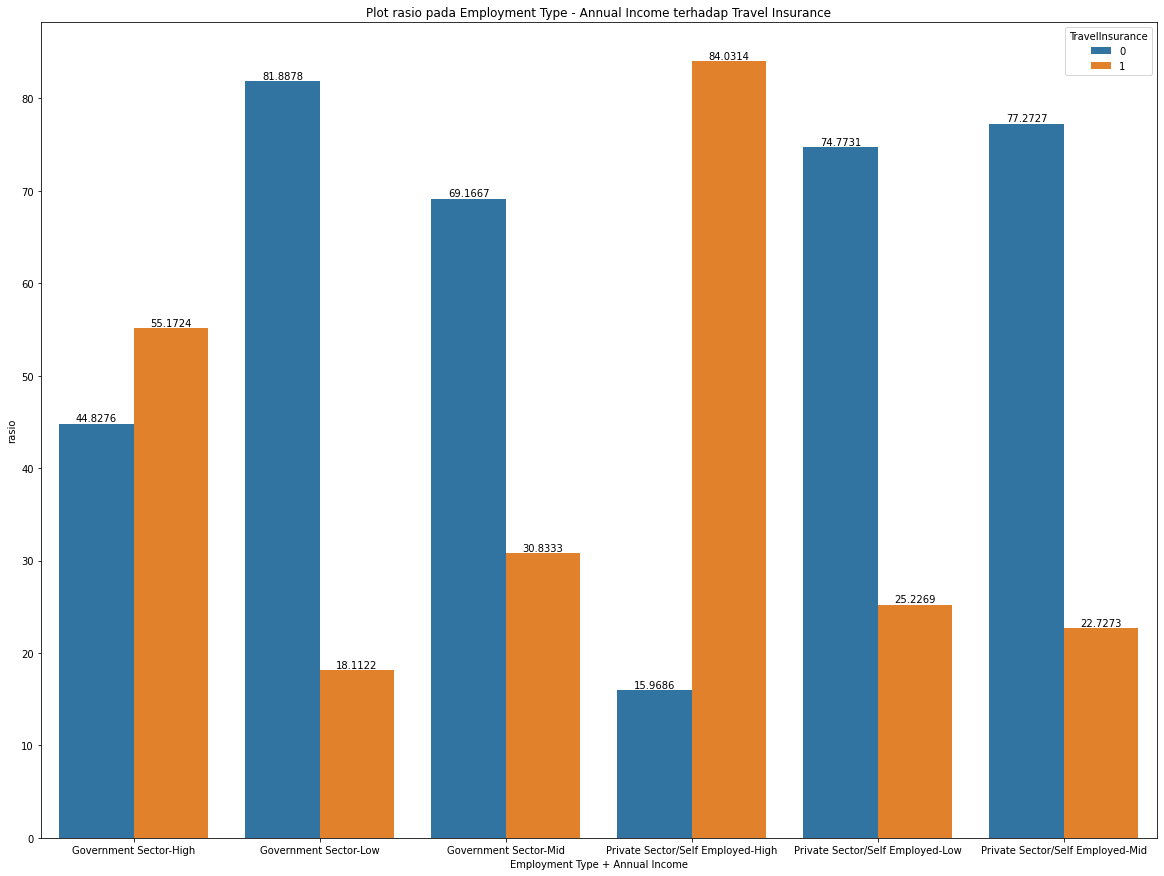

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.barplot(x='Combinasi', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('Employment Type + Annual Income')
plt.title('Plot rasio pada Employment Type - Annual Income terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

Dari plot di samping juga dapat dilihat bahwasanya orang-orang dari private sector dan berasal dari segment pendapatan High memiliki rasio pembelian travel insurance lebih tinggi daripada orang-orang yang berasal dari sektor pemerintahan dan berasal dari segment pendapatan yang sama, ini juga mungkin disebabkan dari kecenderungan orang-orang dari private sector yang sering melakukan penerbangan.

**Plot rasio pada Frequent Flyer dan Ever Travel Abroad terhadap Travel Insurance**

In [ ]:
def segment_frequentflyer(z):
    if (z['FrequentFlyer']=='No'):
        segment ='No'
    elif (z['FrequentFlyer'])=='Yes':
        segment = 'Yes'
    return segment

df['segment_FrequentFlyer'] = df.apply(lambda z: segment_frequentflyer(z), axis=1)

In [ ]:
p = df.groupby(['EverTravelledAbroad', 'segment_FrequentFlyer', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi_2'] = p['EverTravelledAbroad'] + '-' + p['segment_FrequentFlyer'].astype(str)

pp = p.groupby(['Combinasi_2', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda z:100 * z/ float(z.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi_2', 'TravelInsurance'])
pppp

,Combinasi_2,TravelInsurance,rasio,index
0,No-No,0,76.362297,1037
1,No-No,1,23.637703,321
2,No-Yes,0,63.453815,158
3,No-Yes,1,36.546185,91
4,Yes-No,0,29.245283,62
5,Yes-No,1,70.754717,150
6,Yes-Yes,0,11.904762,20
7,Yes-Yes,1,88.095238,148


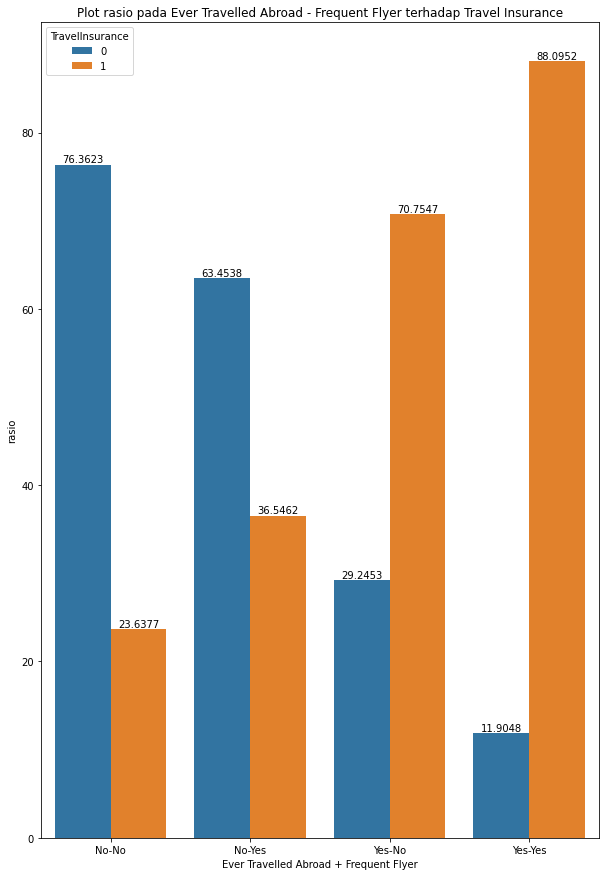

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x='Combinasi_2', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('Ever Travelled Abroad + Frequent Flyer')
plt.title('Plot rasio pada Ever Travelled Abroad - Frequent Flyer terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

Juga terlihat dari plot di samping bahwasanya orang-orang yang pernah terbang ke luar negeri dan juga sering melakukan penerbangan memiliki nilai pembelian insurance yang paling tinggi, diikuti dengan mereka yang pernah terbang ke luar negeri akan tetapi jarang melakukan penerbangan.


**Business Reccomendation**

- Tim marketing dapat membuat campaign yang berfokus kepada mereka yang berasal dari orang-orang yang sering melakukan penerbangan, orang-orang yang pernah melakukan penerbangan ke luar negeri, memiliki penghasilan yang tinggi dan bekerja di private sector sehingga lebih mudah untuk menarik perhatian dan minat mereka untuk membeli travel insurance.

- Tim marketing juga bisa mengurangi atau memberhentikan pemberian campaign kepada mereka yang berasal dari luar 4 kategori tadi agar cost campaign bisa menurun atau bisa dialokasikan kepada pemberian campaign kepada customer yang masuk ke dalam salah satu dari 4 kategori tadi.

- Campaign yang diberikan dapat berupa awareness kepada para customer atau calon customer yang masuk ke dalam salah satu dari ke-4 kategori tadi agar nantinya diharapkan mereka akan lebih memahami fungsi dari travel insurance yang disediakan oleh UNO Inc. 


## Preprocessing

### Data Cleansing

In [16]:
# Remove baris data duplikat
df = df.drop_duplicates(subset = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad',"TravelInsurance"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                1249 non-null   int64 
 1   Age                  1249 non-null   int64 
 2   Employment Type      1249 non-null   object
 3   GraduateOrNot        1249 non-null   object
 4   AnnualIncome         1249 non-null   int64 
 5   FamilyMembers        1249 non-null   int64 
 6   ChronicDiseases      1249 non-null   int64 
 7   FrequentFlyer        1249 non-null   object
 8   EverTravelledAbroad  1249 non-null   object
 9   TravelInsurance      1249 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 107.3+ KB


**Interpretasi** 

Setelah dilakukan remove baris duplikat, hanya tersisa 1249 baris data customer. 

### Feature Transformation

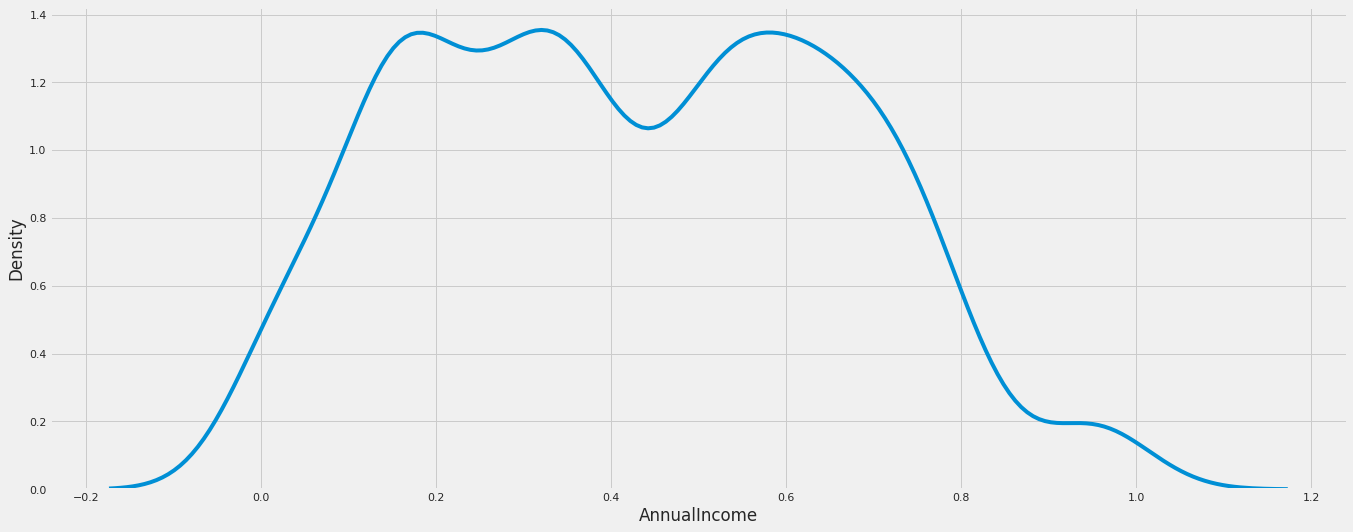

In [ ]:
# Distribusi Annual Income
from sklearn.preprocessing import MinMaxScaler
sns.kdeplot(df['AnnualIncome'])

In [20]:
#Melakukan Normalisasi Data Annual Income (Re-scale ke [0,1])
df['AnnualIncome_Norm'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
df.head()

,index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Norm
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,0.066667
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,0.633333
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,0.133333
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,0.266667
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,0.266667


In [35]:
# Distribusi Annual Income yang sudah dinormalisasi
from sklearn.preprocessing import MinMaxScaler

df['AnnualIncome_Norm'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Norm
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,0.066667
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,0.633333
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,0.133333
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,0.266667
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,0.266667


### Feature Encoding

In [22]:
# Melakukan Categorial Encoding agar data kategorik bisa ditampilkan di heatmap
lambda x: 1 if x==True else 0
df['income_bracket'] = df['AnnualIncome'].apply(lambda x: 1 if x>= 1300001 else 0)
df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})

df.head()

,index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Norm,income_bracket
0,0,31,0,1,400000,6,1,0,0,0,0.066667,0
1,1,31,1,1,1250000,7,0,0,0,0,0.633333,0
2,2,34,1,1,500000,4,1,0,0,1,0.133333,0
3,3,28,1,1,700000,3,1,0,0,0,0.266667,0
4,4,28,1,1,700000,8,1,1,0,0,0.266667,0


### Feature Selection

**Chi-Square**

<AxesSubplot: >

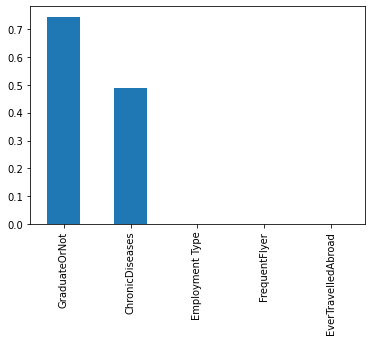

In [ ]:
Cats = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','ChronicDiseases']
df_cats = df[Cats]
df_cats = df_cats.astype(str)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cats['Employment Type'] = label_encoder.fit_transform(df_cats['Employment Type'])
df_cats['GraduateOrNot'] = label_encoder.fit_transform(df_cats['GraduateOrNot'])
df_cats['FrequentFlyer'] = label_encoder.fit_transform(df_cats['FrequentFlyer'])
df_cats['EverTravelledAbroad'] = label_encoder.fit_transform(df_cats['EverTravelledAbroad'])
df_cats['ChronicDiseases'] = label_encoder.fit_transform(df_cats['ChronicDiseases'])


from sklearn.feature_selection import chi2
X = df_cats
y = df['TravelInsurance']

chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


**Intepretasi**

Chi Square digunakan untuk fitur kategorik terhadap target kategorik. Fitur kategorik yang akan dites adalah GraduateOrNot, ChronicDiseasses, Employment Type, FrequentFlyer, EverTravelledAbroad.

Berdasarkan grafik diatas fitur yang digunakan :
- Employment Type
- FrequentFlyer
- EverTravelledAbroad


Berdasarkan hasil uji chi-square fitur yang tidak digunakan adalah GraduateOrNot dan ChronicDiseasses.


**Anova**

Feature Age: 3.610883
Feature AnnualIncome: 251.094542
Feature FamilyMembers: 12.293209


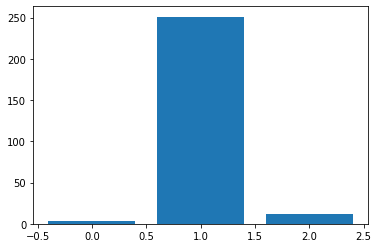

In [ ]:
nums = ['Age','AnnualIncome','FamilyMembers']
df_nums = df[nums]

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X = df_nums
y = df["TravelInsurance"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (nums[i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

**Intepretasi**

Anova digunakan untuk fitur numerik  terhadap target kategorik.

Berdasarkan grafik diatas fitur yang dapat digunakan :
- Age
- AnnualIncome
- FamilyMembers


Berdasarkan hasil Anova semua fitur bisa digunakan untuk pembuatan model. Walaupun begitu fitur FamilyMembers tidak akan digunakan dalam data preprocessing alasannya karena berdasarkan pandangan bisnis terkait produk yang ingin ditawarkan kepada customer yaitu produk untuk satu individu saja dan hanya mengcover individu yang membeli tersebut. Oleh sebab itu, fitur yang dipilih adalah Age dan AnnualIncome saja.

Selain itu, berdasarkan hasil analisa melalui heatmap di stage sebelumnya feature family member tidak berkorelasi kuat dengan target. 



**Tampilan Fitur yang dipilih untuk data preprocessing**

In [17]:
df.loc[:, ~df.columns.isin(['GraduateOrNot','ChronicDiseases', 'FamilyMembers'])]

,index,Age,Employment Type,AnnualIncome,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,400000,No,No,0
1,1,31,Private Sector/Self Employed,1250000,No,No,0
2,2,34,Private Sector/Self Employed,500000,No,No,1
3,3,28,Private Sector/Self Employed,700000,No,No,0
4,4,28,Private Sector/Self Employed,700000,Yes,No,0
...,...,...,...,...,...,...,...
1976,1976,32,Government Sector,900000,No,No,0
1981,1981,27,Government Sector,850000,No,No,1
1982,1982,33,Private Sector/Self Employed,1500000,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,1750000,No,Yes,0


### Feature Extraction

In [23]:
#Kombinasi Frequent Flyer dan Ever Travelled Abroad
df["Traveller"]=df["FrequentFlyer"]*df["EverTravelledAbroad"]
df.head()


,index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Norm,income_bracket,Traveller
0,0,31,0,1,400000,6,1,0,0,0,0.066667,0,0
1,1,31,1,1,1250000,7,0,0,0,0,0.633333,0,0
2,2,34,1,1,500000,4,1,0,0,1,0.133333,0,0
3,3,28,1,1,700000,3,1,0,0,0,0.266667,0,0
4,4,28,1,1,700000,8,1,1,0,0,0.266667,0,0


In [24]:
#Segmentasi low dan high dari kolom AnnualIncome
df['income_bracket'] = df['AnnualIncome'].apply(lambda x: 1 if x > 1300000 else 0)
df.head()

,index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Norm,income_bracket,Traveller
0,0,31,0,1,400000,6,1,0,0,0,0.066667,0,0
1,1,31,1,1,1250000,7,0,0,0,0,0.633333,0,0
2,2,34,1,1,500000,4,1,0,0,1,0.133333,0,0
3,3,28,1,1,700000,3,1,0,0,0,0.266667,0,0
4,4,28,1,1,700000,8,1,1,0,0,0.266667,0,0


In [25]:
#pembagian umur menjadi di atas 30 dan di bawah 30
df['age_bracket'] = df['Age'].apply(lambda x: 1 if x < 31 else 0)

df.head()

,index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Norm,income_bracket,Traveller,age_bracket
0,0,31,0,1,400000,6,1,0,0,0,0.066667,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0,0.633333,0,0,0
2,2,34,1,1,500000,4,1,0,0,1,0.133333,0,0,0
3,3,28,1,1,700000,3,1,0,0,0,0.266667,0,0,1
4,4,28,1,1,700000,8,1,1,0,0,0.266667,0,0,1


train model semua feature (kalau salah cut ajah)

In [26]:
X = df.drop(["TravelInsurance"], axis=1)
y = df["TravelInsurance"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)
print('Train Shape: ', X_train.shape)
print('Test Shape: ', X_test.shape)

Train Shape:  (832, 13)
Test Shape:  (417, 13)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [28]:
model = [rf, dt, svc, gb, dt, knn]
for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared =False)
    r2 = r2_score(y_test, y_pred)
    accu = accuracy_score(y_test, y_pred)
    print(model,'\n', 'mae:', mae, '\n', 'rmse:', rmse, '\n', 'r2 score:', r2,'\n','accuracy score:', accu,'\n')

RandomForestClassifier() 
 mae: 0.2709832134292566 
 rmse: 0.5205604800878151 
 r2 score: -0.1514833097111581 
 accuracy score: 0.7290167865707434 

DecisionTreeClassifier() 
 mae: 0.31654676258992803 
 rmse: 0.5626248862163209 
 r2 score: -0.3450955476271935 
 accuracy score: 0.6834532374100719 

SVC() 
 mae: 0.27577937649880097 
 rmse: 0.5251470046556497 
 r2 score: -0.17186354528126713 
 accuracy score: 0.7242206235011991 

GradientBoostingClassifier() 
 mae: 0.2182254196642686 
 rmse: 0.46714603676395305 
 r2 score: 0.0726992815600408 
 accuracy score: 0.7817745803357314 

DecisionTreeClassifier() 
 mae: 0.3261390887290168 
 rmse: 0.5710858855977942 
 r2 score: -0.3858560187674114 
 accuracy score: 0.6738609112709832 

KNeighborsClassifier() 
 mae: 0.2829736211031175 
 rmse: 0.5319526493054786 
 r2 score: -0.20243389863643046 
 accuracy score: 0.7170263788968825 



In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.79       291
           1       0.53      0.66      0.58       126

    accuracy                           0.72       417
   macro avg       0.68      0.70      0.68       417
weighted avg       0.74      0.72      0.72       417

